Rayleigh-Taylor instability
======

This notebook models the Rayleigh-Taylor instability outlined in Kaus *et al.* (2010). 

**Keywords:** Stress state, Free surface

**References**
1. Kaus, B. J., Mühlhaus, H., & May, D. A. (2010). A stabilization algorithm for geodynamic numerical simulations with a free surface. Physics of the Earth and Planetary Interiors, 181(1-2), 12-20.

![](./images/kaus2010RTI.gif)

In [1]:
from underworld import UWGeodynamics as GEO
from underworld import visualisation as vis

import underworld.function as fn
import math
import numpy as np

loaded rc file /opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

KL = 500 * u.kilometer
K_viscosity = 1e20  * u.pascal * u.second
K_density   = 3200 * u.kilogram / u.meter**3

KM = K_density * KL**3
Kt = KM/ ( KL * K_viscosity )

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [3]:
Model = GEO.Model(elementRes=(50,50),
                  minCoord=(-250. * u.kilometer, -500. * u.kilometer),  
                  maxCoord=(250. * u.kilometer, 0. * u.kilometer),
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

dt = 2.5*u.kiloyear
dt_str = "%.1f" %(dt.m)
checkpoint_interval = 1e2*u.kiloyear
fdir = "1_23_02_FreeSurface_Kaus2010_Rayleigh-Taylor_Instability_dt"+dt_str+"ka"
Model.outputDir = fdir

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50
In func WeightsCalculator_CalculateAll(): for swarm "YZTE0G44__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "YZTE0G44__swarm"


In [4]:
wavelength = GEO.nd(KL)
amplitude  = GEO.nd(5*u.kilometer)
offset     = GEO.nd(-100.*u.kilometer)
k = 2. * math.pi / wavelength

coord = fn.coord()
perturbationFn = offset + amplitude*fn.math.cos(k*coord[0])

lightShape = perturbationFn > coord[1] 
densShape  = perturbationFn <= coord[1]

densMaterial = Model.add_material(name="Dense Material", shape=densShape)
lightMaterial = Model.add_material(name="Light Material", shape=lightShape)

In [5]:
densMaterial.density  = 3300 * u.kilogram / u.metre**3
lightMaterial.density = 3200 * u.kilogram / u.metre**3

densMaterial.viscosity = 1e21 * u.pascal * u.second
lightMaterial.viscosity = 1e20 * u.pascal * u.second

In [6]:
npoints = 1000
coords = np.ndarray((npoints, 2))
coords[:, 0] = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), npoints)
coords[:, 1] = offset + amplitude*np.cos(k*coords[:, 0])

Model.add_passive_tracers(name="interface", vertices=coords)


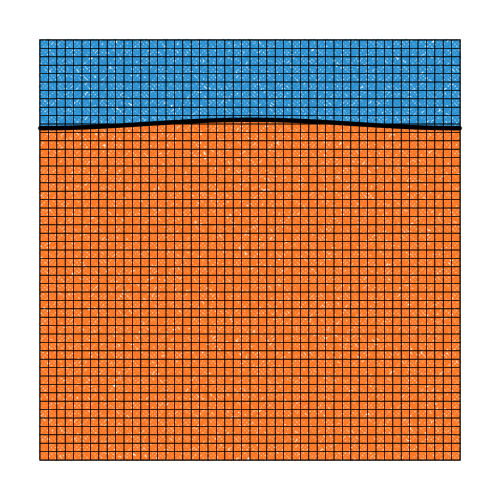

In [8]:
Fig = vis.Figure(figsize=(500, 500))
Fig.Points(Model.interface_tracers, pointSize=5.0)
Fig.Points(Model.swarm, Model.materialField,pointSize=3.,colourBar=False)
Fig.Mesh(Model.mesh)
Fig.save("Fig_Kaus2010RTI_0.png")
Fig.show()

In [7]:
Model.swarm.data.shape

(100000, 2)

In [11]:
Model.mesh.data_nodegId

array([   0,    1,    2, ..., 2598, 2599, 2600], dtype=int32)

In [9]:
idcell=Model.swarm.owningCell.data
np.where(idcell==0)[0].shape,np.where(idcell==2499)[0].shape,np.where(idcell==2399)[0].shape

((40,), (40,), (40,))

In [12]:
idcell=Model.swarm.owningCell.data
for i in range(2399,2499):
    print(np.where(idcell==i)[0].shape)

(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)


In [13]:
Model.set_velocityBCs(left=[0., None], right=[0., None], top=[None, None], bottom=[0.,0.])
Model.freeSurface = True

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50


In [14]:
Model.run_for(5.5 * u.megayears, checkpoint_interval=checkpoint_interval,dt= dt)

Options:  -Q22_pc_type uw -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-06 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.27262e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00137 secs 
  RHS V Solve:            = 0.003689 secs / 7 its
  Pressure Solve:         = 0.03692 secs / 10 its
  Final V Solve:          = 0.003564 secs / 7 its

  Total BSSCR Linear solve time: 0.053739 seconds

Linear solver (032NEXLK__system-execute), solution time 5.473544e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0598 [min] /    0.0598 [max] (secs)
Time Integration - 0.

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.27945e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001366 secs 
  RHS V Solve:            = 0.003497 secs / 7 its
  Pressure Solve:         = 0.04156 secs / 10 its
  Final V Solve:          = 0.004129 secs / 7 its

  Total BSSCR Linear solve time: 0.058049 seconds

Linear solver (032NEXLK__system-execute), solution time 5.834317e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0869 [min] /    0.0869 [max] (secs)
Time Integration - 0.0869549 [min] / 0.0869549 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.311740e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008061

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0872 [min] /    0.0872 [max] (secs)
Time Integration - 0.0872527 [min] / 0.0872527 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.383789e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000877258 [min] / 0.000877258 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:    13 Model Time: 32500.0 year dt: 2500.0 year (2022-11-08 05:52:29)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.34310e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.36756e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001457 secs 
  RHS V Solve:            = 0.003797 secs / 7 its
  Pressure Solve:         = 0.03655 secs / 10 its
  Final V Solve:          = 0.003574 secs / 7 its

  Total BSSCR Linear solve time: 0.053655 seconds

Linear solver (032NEXLK__system-execute), solution time 5.394928e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0811 [min] /    0.0811 [max] (secs)
Time Integration - 0.0811787 [min] / 0.0811787 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.407262e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008132

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0880 [min] /    0.0880 [max] (secs)
Time Integration - 0.0880086 [min] / 0.0880086 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.458727e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000835452 [min] / 0.000835452 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:    26 Model Time: 65000.0 year dt: 2500.0 year (2022-11-08 05:52:37)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37489e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29929e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001385 secs 
  RHS V Solve:            = 0.003591 secs / 7 its
  Pressure Solve:         = 0.0312 secs / 9 its
  Final V Solve:          = 0.003335 secs / 7 its

  Total BSSCR Linear solve time: 0.047126 seconds

Linear solver (032NEXLK__system-execute), solution time 4.742305e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0825 [min] /    0.0825 [max] (secs)
Time Integration - 0.0825782 [min] / 0.0825782 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.891861e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00079693 

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0882 [min] /    0.0882 [max] (secs)
Time Integration - 0.0882216 [min] / 0.0882216 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.864040e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.00074447 [min] / 0.00074447 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:    39 Model Time: 97500.0 year dt: 2500.0 year (2022-11-08 05:52:43)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30389e-03 
  Setting schur_pc to "uw"

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0884 [min] /    0.0884 [max] (secs)
Time Integration - 0.0884321 [min] / 0.0884321 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.499577e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000837712 [min] / 0.000837712 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:    45 Model Time: 112500.0 year dt: 2500.0 year (2022-11-08 05:52:48)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38290e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.27813e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001362 secs 
  RHS V Solve:            = 0.003593 secs / 7 its
  Pressure Solve:         = 0.0309 secs / 9 its
  Final V Solve:          = 0.003288 secs / 7 its

  Total BSSCR Linear solve time: 0.046736 seconds

Linear solver (032NEXLK__system-execute), solution time 4.702875e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0829 [min] /    0.0829 [max] (secs)
Time Integration - 0.082959 [min] / 0.082959 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.290088e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000768914 [

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0823 [min] /    0.0823 [max] (secs)
Time Integration - 0.0822834 [min] / 0.0822834 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.227878e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000747764 [min] / 0.000747764 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:    58 Model Time: 145000.0 year dt: 2500.0 year (2022-11-08 05:52:55)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35220e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.27642e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001358 secs 
  RHS V Solve:            = 0.003717 secs / 7 its
  Pressure Solve:         = 0.03487 secs / 10 its
  Final V Solve:          = 0.003418 secs / 7 its

  Total BSSCR Linear solve time: 0.050892 seconds

Linear solver (032NEXLK__system-execute), solution time 5.117483e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0839 [min] /    0.0839 [max] (secs)
Time Integration - 0.0839185 [min] / 0.0839185 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.899959e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008135

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0880 [min] /    0.0880 [max] (secs)
Time Integration - 0.0880119 [min] / 0.0880119 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.806504e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000740347 [min] / 0.000740347 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:    71 Model Time: 177500.0 year dt: 2500.0 year (2022-11-08 05:53:01)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.25024e-03 
  Setting schur_pc to "

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.288039e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000738894 [min] / 0.000738894 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:    77 Model Time: 192500.0 year dt: 2500.0 year (2022-11-08 05:53:05)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28159e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001376 secs 
  RHS V Solve:            = 0.003695 secs / 7 its
  Pressure Solve:         = 0.03475 secs / 10 i

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.26081e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001341 secs 
  RHS V Solve:            = 0.003799 secs / 7 its
  Pressure Solve:         = 0.03524 secs / 10 its
  Final V Solve:          = 0.003491 secs / 7 its

  Total BSSCR Linear solve time: 0.051404 seconds

Linear solver (032NEXLK__system-execute), solution time 5.172523e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.0840176 [min] / 0.0840176 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.294714e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008248

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0889 [min] /    0.0889 [max] (secs)
Time Integration - 0.0889527 [min] / 0.0889527 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.585474e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00086139 [min] / 0.00086139 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:    90 Model Time: 225000.0 year dt: 2500.0 year (2022-11-08 05:53:13)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39478e-03 
  Setting schur_pc to "uw

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29946e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001388 secs 
  RHS V Solve:            = 0.003671 secs / 7 its
  Pressure Solve:         = 0.03461 secs / 10 its
  Final V Solve:          = 0.003457 secs / 7 its

  Total BSSCR Linear solve time: 0.050823 seconds

Linear solver (032NEXLK__system-execute), solution time 5.111757e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.0847024 [min] / 0.0847024 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.251329e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008052

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.0903519 [min] / 0.0903519 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.439622e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000862278 [min] / 0.000862278 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   103 Model Time: 257500.0 year dt: 2500.0 year (2022-11-08 05:53:20)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44898e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38699e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001477 secs 
  RHS V Solve:            = 0.003956 secs / 7 its
  Pressure Solve:         = 0.04494 secs / 12 its
  Final V Solve:          = 0.00367 secs / 7 its

  Total BSSCR Linear solve time: 0.062311 seconds

Linear solver (032NEXLK__system-execute), solution time 6.262249e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.0887667 [min] / 0.0887667 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.539246e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00088490

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0888 [min] /    0.0888 [max] (secs)
Time Integration - 0.0888851 [min] / 0.0888851 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.818054e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000702195 [min] / 0.000702195 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   116 Model Time: 290000.0 year dt: 2500.0 year (2022-11-08 05:53:27)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29544e-03 
  Setting schur_pc to "

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.0829965 [min] / 0.0829965 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.305674e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000814481 [min] / 0.000814481 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   122 Model Time: 305000.0 year dt: 2500.0 year (2022-11-08 05:53:32)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.27176e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37645e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001475 secs 
  RHS V Solve:            = 0.003873 secs / 7 its
  Pressure Solve:         = 0.04469 secs / 12 its
  Final V Solve:          = 0.003643 secs / 7 its

  Total BSSCR Linear solve time: 0.061838 seconds

Linear solver (032NEXLK__system-execute), solution time 6.216115e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0825 [min] /    0.0825 [max] (secs)
Time Integration - 0.0825473 [min] / 0.0825473 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.293788e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0007993

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.0829992 [min] / 0.0829992 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.286073e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000837865 [min] / 0.000837865 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   135 Model Time: 337500.0 year dt: 2500.0 year (2022-11-08 05:53:38)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31807e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38117e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001479 secs 
  RHS V Solve:            = 0.003877 secs / 7 its
  Pressure Solve:         = 0.04511 secs / 12 its
  Final V Solve:          = 0.003624 secs / 7 its

  Total BSSCR Linear solve time: 0.062389 seconds

Linear solver (032NEXLK__system-execute), solution time 6.269862e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0883 [min] /    0.0883 [max] (secs)
Time Integration - 0.0883793 [min] / 0.0883793 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.513013e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008247

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0895202 [min] / 0.0895202 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.429755e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000890795 [min] / 0.000890795 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   148 Model Time: 370000.0 year dt: 2500.0 year (2022-11-08 05:53:45)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39494e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39401e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001494 secs 
  RHS V Solve:            = 0.00393 secs / 7 its
  Pressure Solve:         = 0.04536 secs / 12 its
  Final V Solve:          = 0.003749 secs / 7 its

  Total BSSCR Linear solve time: 0.062793 seconds

Linear solver (032NEXLK__system-execute), solution time 6.310418e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0857 [min] /    0.0857 [max] (secs)
Time Integration - 0.08577 [min] / 0.08577 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.764258e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000786685 [m

Step:   160 Model Time: 400000.0 year dt: 2500.0 year (2022-11-08 05:53:54)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44286e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001537 secs 
  RHS V Solve:            = 0.003823 secs / 7 its
  Pressure Solve:         = 0.04084 secs / 11 its
  Final V Solve:          = 0.003806 secs / 7 its

  Total BSSCR Linear solve time: 0.058122 seconds

Linear solver (032NEXLK__system-execute), solution time 5.846942e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0821 [min] /    0.0821 [max] (secs)
Time Integration - 0.0821529 [min] / 0.0821529 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.280068e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integ


BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38812e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001489 secs 
  RHS V Solve:            = 0.003847 secs / 7 its
  Pressure Solve:         = 0.0422 secs / 11 its
  Final V Solve:          = 0.003839 secs / 7 its

  Total BSSCR Linear solve time: 0.059780 seconds

Linear solver (032NEXLK__system-execute), solution time 6.010052e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0885 [min] /    0.0885 [max] (secs)
Time Integration - 0.0885681 [min] / 0.0885681 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.468219e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000898974 [min] / 0.000898974 [max] (secs)
In func

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0831 [min] /    0.0831 [max] (secs)
Time Integration - 0.0831329 [min] / 0.0831329 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.344866e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000810024 [min] / 0.000810024 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   173 Model Time: 432500.0 year dt: 2500.0 year (2022-11-08 05:54:01)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35344e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.58870e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001745 secs 
  RHS V Solve:            = 0.004135 secs / 7 its
  Pressure Solve:         = 0.04181 secs / 11 its
  Final V Solve:          = 0.003682 secs / 7 its

  Total BSSCR Linear solve time: 0.060023 seconds

Linear solver (032NEXLK__system-execute), solution time 6.043330e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.083039 [min] / 0.083039 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.284070e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000832033

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.544005e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000869638 [min] / 0.000869638 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   186 Model Time: 465000.0 year dt: 2500.0 year (2022-11-08 05:54:08)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41319e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00151 secs 
  RHS V Solve:            = 0.003811 secs / 7 its
  Pressure Solve:         = 0.03307 secs / 9 its

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39403e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001493 secs 
  RHS V Solve:            = 0.003901 secs / 7 its
  Pressure Solve:         = 0.03314 secs / 9 its
  Final V Solve:          = 0.003584 secs / 7 its

  Total BSSCR Linear solve time: 0.050249 seconds

Linear solver (032NEXLK__system-execute), solution time 5.055570e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0885 [min] /    0.0885 [max] (secs)
Time Integration - 0.0885399 [min] / 0.0885399 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.901860e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.00074562

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0897 [min] /    0.0897 [max] (secs)
Time Integration - 0.0897107 [min] / 0.0897107 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.892903e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.00074439 [min] / 0.00074439 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   199 Model Time: 497500.0 year dt: 2500.0 year (2022-11-08 05:54:14)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31012e-03 
  Setting schur_pc to "uw

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0886 [min] /    0.0886 [max] (secs)
Time Integration - 0.0886154 [min] / 0.0886154 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.145542e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000746557 [min] / 0.000746557 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   205 Model Time: 512500.0 year dt: 2500.0 year (2022-11-08 05:54:19)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.26207e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29807e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001391 secs 
  RHS V Solve:            = 0.003711 secs / 7 its
  Pressure Solve:         = 0.03495 secs / 10 its
  Final V Solve:          = 0.003445 secs / 7 its

  Total BSSCR Linear solve time: 0.051267 seconds

Linear solver (032NEXLK__system-execute), solution time 5.155232e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0831 [min] /    0.0831 [max] (secs)
Time Integration - 0.0831264 [min] / 0.0831264 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.299298e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008099

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0835 [min] /    0.0835 [max] (secs)
Time Integration - 0.0835758 [min] / 0.0835758 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.329180e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000814787 [min] / 0.000814787 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   218 Model Time: 545000.0 year dt: 2500.0 year (2022-11-08 05:54:26)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28809e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28709e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001384 secs 
  RHS V Solve:            = 0.003795 secs / 7 its
  Pressure Solve:         = 0.03491 secs / 10 its
  Final V Solve:          = 0.003509 secs / 7 its

  Total BSSCR Linear solve time: 0.051309 seconds

Linear solver (032NEXLK__system-execute), solution time 5.159491e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.0833595 [min] / 0.0833595 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.348370e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0007850

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0892 [min] /    0.0892 [max] (secs)
Time Integration - 0.0892478 [min] / 0.0892478 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.449918e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000815664 [min] / 0.000815664 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   231 Model Time: 577500.0 year dt: 2500.0 year (2022-11-08 05:54:33)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35475e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39873e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001497 secs 
  RHS V Solve:            = 0.003977 secs / 7 its
  Pressure Solve:         = 0.03774 secs / 10 its
  Final V Solve:          = 0.003627 secs / 7 its

  Total BSSCR Linear solve time: 0.055013 seconds

Linear solver (032NEXLK__system-execute), solution time 5.531402e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0831 [min] /    0.0831 [max] (secs)
Time Integration - 0.0831579 [min] / 0.0831579 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.297315e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008189

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29569e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001386 secs 
  RHS V Solve:            = 0.00371 secs / 7 its
  Pressure Solve:         = 0.03488 secs / 10 its
  Final V Solve:          = 0.003452 secs / 7 its

  Total BSSCR Linear solve time: 0.051133 seconds

Linear solver (032NEXLK__system-execute), solution time 5.142971e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.0838448 [min] / 0.0838448 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.362609e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00079868

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0893 [min] /    0.0893 [max] (secs)
Time Integration - 0.089387 [min] / 0.089387 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.592374e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000861314 [min] / 0.000861314 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   250 Model Time: 625000.0 year dt: 2500.0 year (2022-11-08 05:54:45)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39813e-03 
  Setting schur_pc to "uw

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40679e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00151 secs 
  RHS V Solve:            = 0.0039 secs / 7 its
  Pressure Solve:         = 0.03728 secs / 10 its
  Final V Solve:          = 0.003783 secs / 7 its

  Total BSSCR Linear solve time: 0.054807 seconds

Linear solver (032NEXLK__system-execute), solution time 5.511599e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0890 [min] /    0.0890 [max] (secs)
Time Integration - 0.0890348 [min] / 0.0890348 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.447609e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000861604 

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0892 [min] /    0.0892 [max] (secs)
Time Integration - 0.0892306 [min] / 0.0892306 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.455850e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000917093 [min] / 0.000917093 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   263 Model Time: 657500.0 year dt: 2500.0 year (2022-11-08 05:54:51)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.36919e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39803e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001504 secs 
  RHS V Solve:            = 0.003805 secs / 7 its
  Pressure Solve:         = 0.03915 secs / 10 its
  Final V Solve:          = 0.003672 secs / 7 its

  Total BSSCR Linear solve time: 0.056287 seconds

Linear solver (032NEXLK__system-execute), solution time 5.658555e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.0833863 [min] / 0.0833863 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.260064e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008147

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.0887735 [min] / 0.0887735 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.633509e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000889677 [min] / 0.000889677 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   276 Model Time: 690000.0 year dt: 2500.0 year (2022-11-08 05:54:58)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.81798e-03 
  Setting schur_pc to "

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0831 [min] /    0.0831 [max] (secs)
Time Integration - 0.0831676 [min] / 0.0831676 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.360002e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000844689 [min] / 0.000844689 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   282 Model Time: 705000.0 year dt: 2500.0 year (2022-11-08 05:55:03)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.26355e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.21599e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001316 secs 
  RHS V Solve:            = 0.003576 secs / 7 its
  Pressure Solve:         = 0.03055 secs / 9 its
  Final V Solve:          = 0.003349 secs / 7 its

  Total BSSCR Linear solve time: 0.046201 seconds

Linear solver (032NEXLK__system-execute), solution time 4.649363e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.0833023 [min] / 0.0833023 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.343045e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00081239

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0900 [min] /    0.0900 [max] (secs)
Time Integration - 0.0900774 [min] / 0.0900774 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.439025e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000865458 [min] / 0.000865458 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   295 Model Time: 737500.0 year dt: 2500.0 year (2022-11-08 05:55:10)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40372e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30702e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001421 secs 
  RHS V Solve:            = 0.003823 secs / 7 its
  Pressure Solve:         = 0.03534 secs / 10 its
  Final V Solve:          = 0.003554 secs / 7 its

  Total BSSCR Linear solve time: 0.051910 seconds

Linear solver (032NEXLK__system-execute), solution time 5.221452e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0893 [min] /    0.0893 [max] (secs)
Time Integration - 0.0893065 [min] / 0.0893065 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.604506e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0008787

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0841 [min] /    0.0841 [max] (secs)
Time Integration - 0.084189 [min] / 0.084189 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.301883e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000870954 [min] / 0.000870954 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   308 Model Time: 770000.0 year dt: 2500.0 year (2022-11-08 05:55:17)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33161e-03 
  Setting schur_pc to "uw

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45365e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001555 secs 
  RHS V Solve:            = 0.003954 secs / 7 its
  Pressure Solve:         = 0.04568 secs / 12 its
  Final V Solve:          = 0.003758 secs / 7 its

  Total BSSCR Linear solve time: 0.063119 seconds

Linear solver (032NEXLK__system-execute), solution time 6.343284e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0835 [min] /    0.0835 [max] (secs)
Time Integration - 0.0835463 [min] / 0.0835463 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.005550e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008096

Step:   320 Model Time: 800000.0 year dt: 2500.0 year (2022-11-08 05:55:25)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28164e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001379 secs 
  RHS V Solve:            = 0.003931 secs / 7 its
  Pressure Solve:         = 0.04965 secs / 14 its
  Final V Solve:          = 0.003437 secs / 7 its

  Total BSSCR Linear solve time: 0.066300 seconds

Linear solver (032NEXLK__system-execute), solution time 6.659554e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.0918815 [min] / 0.0918815 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.532579e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integ


BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30981e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001412 secs 
  RHS V Solve:            = 0.003772 secs / 7 its
  Pressure Solve:         = 0.05014 secs / 14 its
  Final V Solve:          = 0.00373 secs / 7 its

  Total BSSCR Linear solve time: 0.066842 seconds

Linear solver (032NEXLK__system-execute), solution time 6.716560e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.0908724 [min] / 0.0908724 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.927112e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000753614 [min] / 0.000753614 [max] (secs)
In func

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0902148 [min] / 0.0902148 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.478344e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000887129 [min] / 0.000887129 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   333 Model Time: 832500.0 year dt: 2500.0 year (2022-11-08 05:55:32)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40432e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.26242e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001378 secs 
  RHS V Solve:            = 0.004134 secs / 8 its
  Pressure Solve:         = 0.04542 secs / 13 its
  Final V Solve:          = 0.003393 secs / 7 its

  Total BSSCR Linear solve time: 0.062207 seconds

Linear solver (032NEXLK__system-execute), solution time 6.251040e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0831 [min] /    0.0831 [max] (secs)
Time Integration - 0.0831682 [min] / 0.0831682 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.307596e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008099

	2nd order:                 9HHVVF22__integrand -    0.0896 [min] /    0.0896 [max] (secs)
Time Integration - 0.0896224 [min] / 0.0896224 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.490963e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000898653 [min] / 0.000898653 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   346 Model Time: 865000.0 year dt: 2500.0 year (2022-11-08 05:55:39)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.46978e-03 
  Setting schur_pc to "uw" 


SCR Solver

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38081e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001487 secs 
  RHS V Solve:            = 0.004638 secs / 8 its
  Pressure Solve:         = 0.03782 secs / 10 its
  Final V Solve:          = 0.003714 secs / 7 its

  Total BSSCR Linear solve time: 0.056239 seconds

Linear solver (032NEXLK__system-execute), solution time 5.655904e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0895411 [min] / 0.0895411 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.705189e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009167

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0831 [min] /    0.0831 [max] (secs)
Time Integration - 0.0831172 [min] / 0.0831172 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.354082e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000810048 [min] / 0.000810048 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   359 Model Time: 897500.0 year dt: 2500.0 year (2022-11-08 05:55:46)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28991e-03 
  Setting schur_pc to "

	2nd order:                 9HHVVF22__integrand -    0.0845 [min] /    0.0845 [max] (secs)
Time Integration - 0.0845397 [min] / 0.0845397 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.369309e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000815829 [min] / 0.000815829 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   365 Model Time: 912500.0 year dt: 2500.0 year (2022-11-08 05:55:51)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29673e-03 
  Setting schur_pc to "uw" 


SCR Solver

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38723e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001501 secs 
  RHS V Solve:            = 0.004438 secs / 8 its
  Pressure Solve:         = 0.04124 secs / 11 its
  Final V Solve:          = 0.003656 secs / 7 its

  Total BSSCR Linear solve time: 0.059162 seconds

Linear solver (032NEXLK__system-execute), solution time 5.947497e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.0841924 [min] / 0.0841924 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.065807e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008202

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.0838881 [min] / 0.0838881 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.309726e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000859531 [min] / 0.000859531 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   378 Model Time: 945000.0 year dt: 2500.0 year (2022-11-08 05:55:58)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28790e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42063e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001532 secs 
  RHS V Solve:            = 0.004446 secs / 8 its
  Pressure Solve:         = 0.03777 secs / 10 its
  Final V Solve:          = 0.003674 secs / 7 its

  Total BSSCR Linear solve time: 0.056603 seconds

Linear solver (032NEXLK__system-execute), solution time 5.693875e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0850 [min] /    0.0850 [max] (secs)
Time Integration - 0.0850079 [min] / 0.0850079 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.440343e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008265

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.0838121 [min] / 0.0838121 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.350419e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000854643 [min] / 0.000854643 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   391 Model Time: 977500.0 year dt: 2500.0 year (2022-11-08 05:56:05)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35547e-03 
  Setting schur_pc to "

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29512e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001387 secs 
  RHS V Solve:            = 0.004336 secs / 8 its
  Pressure Solve:         = 0.04238 secs / 12 its
  Final V Solve:          = 0.003454 secs / 7 its

  Total BSSCR Linear solve time: 0.059939 seconds

Linear solver (032NEXLK__system-execute), solution time 6.024719e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0835 [min] /    0.0835 [max] (secs)
Time Integration - 0.0835266 [min] / 0.0835266 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.390046e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008423

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41874e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001514 secs 
  RHS V Solve:            = 0.004548 secs / 8 its
  Pressure Solve:         = 0.04511 secs / 12 its
  Final V Solve:          = 0.003699 secs / 7 its

  Total BSSCR Linear solve time: 0.063271 seconds

Linear solver (032NEXLK__system-execute), solution time 6.358307e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0834 [min] /    0.0834 [max] (secs)
Time Integration - 0.0834399 [min] / 0.0834399 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.285150e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008235

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0906 [min] /    0.0906 [max] (secs)
Time Integration - 0.0906114 [min] / 0.0906114 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.903282e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000743269 [min] / 0.000743269 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   410 Model Time: 1.0 megayear dt: 2500.0 year (2022-11-08 05:56:17)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29795e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31282e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001401 secs 
  RHS V Solve:            = 0.004209 secs / 8 its
  Pressure Solve:         = 0.04288 secs / 12 its
  Final V Solve:          = 0.003504 secs / 7 its

  Total BSSCR Linear solve time: 0.059758 seconds

Linear solver (032NEXLK__system-execute), solution time 6.008456e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.08425 [min] / 0.08425 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.127208e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00088498 [m

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0836 [min] /    0.0836 [max] (secs)
Time Integration - 0.0836701 [min] / 0.0836701 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.032482e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000827026 [min] / 0.000827026 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   423 Model Time: 1.1 megayear dt: 2500.0 year (2022-11-08 05:56:24)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38899e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38629e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001482 secs 
  RHS V Solve:            = 0.004379 secs / 8 its
  Pressure Solve:         = 0.04233 secs / 11 its
  Final V Solve:          = 0.003614 secs / 7 its

  Total BSSCR Linear solve time: 0.059970 seconds

Linear solver (032NEXLK__system-execute), solution time 6.028368e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.0838642 [min] / 0.0838642 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.304561e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008282

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0905 [min] /    0.0905 [max] (secs)
Time Integration - 0.090529 [min] / 0.090529 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 3.120802e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000934007 [min] / 0.000934007 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   436 Model Time: 1.1 megayear dt: 2500.0 year (2022-11-08 05:56:31)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39810e-03 
  Setting schur_pc to "uw"

	2nd order:                 9HHVVF22__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843041 [min] / 0.0843041 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.338690e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000799682 [min] / 0.000799682 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   442 Model Time: 1.1 megayear dt: 2500.0 year (2022-11-08 05:56:36)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30790e-03 
  Setting schur_pc to "uw" 


SCR Solver 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30176e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001395 secs 
  RHS V Solve:            = 0.00431 secs / 8 its
  Pressure Solve:         = 0.04619 secs / 13 its
  Final V Solve:          = 0.003468 secs / 7 its

  Total BSSCR Linear solve time: 0.063206 seconds

Linear solver (032NEXLK__system-execute), solution time 6.351852e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.0907476 [min] / 0.0907476 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.559108e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00091553

	2nd order:                 9HHVVF22__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0895316 [min] / 0.0895316 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.551147e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000866732 [min] / 0.000866732 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   455 Model Time: 1.1 megayear dt: 2500.0 year (2022-11-08 05:56:43)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38529e-03 
  Setting schur_pc to "uw" 


SCR Solver 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28675e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001372 secs 
  RHS V Solve:            = 0.004461 secs / 8 its
  Pressure Solve:         = 0.04258 secs / 12 its
  Final V Solve:          = 0.003604 secs / 7 its

  Total BSSCR Linear solve time: 0.059950 seconds

Linear solver (032NEXLK__system-execute), solution time 6.024959e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0902263 [min] / 0.0902263 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.929465e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.0007333

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.0833476 [min] / 0.0833476 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.424932e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000821415 [min] / 0.000821415 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   468 Model Time: 1.2 megayear dt: 2500.0 year (2022-11-08 05:56:50)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.54143e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28772e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001383 secs 
  RHS V Solve:            = 0.004224 secs / 8 its
  Pressure Solve:         = 0.03964 secs / 11 its
  Final V Solve:          = 0.003413 secs / 7 its

  Total BSSCR Linear solve time: 0.056480 seconds

Linear solver (032NEXLK__system-execute), solution time 5.679903e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0832 [min] /    0.0832 [max] (secs)
Time Integration - 0.0832094 [min] / 0.0832094 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.356614e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008025

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.0842771 [min] / 0.0842771 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.330322e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000820311 [min] / 0.000820311 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   481 Model Time: 1.2 megayear dt: 0.0 second (2022-11-08 05:5

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.314885e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000805333 [min] / 0.000805333 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   487 Model Time: 1.2 megayear dt: 2500.0 year (2022-11-08 05:57:02)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30243e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001396 secs 
  RHS V Solve:            = 0.004198 secs / 8 its
  Pressure Solve:         = 0.0462 secs / 13 its

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35888e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001447 secs 
  RHS V Solve:            = 0.005219 secs / 8 its
  Pressure Solve:         = 0.0458 secs / 12 its
  Final V Solve:          = 0.0036 secs / 7 its

  Total BSSCR Linear solve time: 0.064232 seconds

Linear solver (032NEXLK__system-execute), solution time 6.459606e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0895379 [min] / 0.0895379 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.517044e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000952927 

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0839 [min] /    0.0839 [max] (secs)
Time Integration - 0.0839551 [min] / 0.0839551 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.301970e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000833363 [min] / 0.000833363 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   500 Model Time: 1.2 megayear dt: 2500.0 year (2022-11-08 05:57:09)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31679e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37172e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001469 secs 
  RHS V Solve:            = 0.004466 secs / 8 its
  Pressure Solve:         = 0.0453 secs / 12 its
  Final V Solve:          = 0.003639 secs / 7 its

  Total BSSCR Linear solve time: 0.063246 seconds

Linear solver (032NEXLK__system-execute), solution time 6.356684e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0831 [min] /    0.0831 [max] (secs)
Time Integration - 0.0830968 [min] / 0.0830968 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.401317e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00080078

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0896 [min] /    0.0896 [max] (secs)
Time Integration - 0.0896158 [min] / 0.0896158 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.520483e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000865833 [min] / 0.000865833 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   513 Model Time: 1.3 megayear dt: 2500.0 year (2022-11-08 05:57:16)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41790e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38697e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001491 secs 
  RHS V Solve:            = 0.004346 secs / 8 its
  Pressure Solve:         = 0.04545 secs / 12 its
  Final V Solve:          = 0.003579 secs / 7 its

  Total BSSCR Linear solve time: 0.063298 seconds

Linear solver (032NEXLK__system-execute), solution time 6.361717e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0895092 [min] / 0.0895092 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.543934e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009071

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29768e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001395 secs 
  RHS V Solve:            = 0.004536 secs / 8 its
  Pressure Solve:         = 0.04276 secs / 12 its
  Final V Solve:          = 0.00358 secs / 7 its

  Total BSSCR Linear solve time: 0.060134 seconds

Linear solver (032NEXLK__system-execute), solution time 6.045238e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0836 [min] /    0.0836 [max] (secs)
Time Integration - 0.0836133 [min] / 0.0836133 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.144282e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00085251

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0896 [min] /    0.0896 [max] (secs)
Time Integration - 0.0896833 [min] / 0.0896833 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.461158e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000871216 [min] / 0.000871216 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   532 Model Time: 1.3 megayear dt: 2500.0 year (2022-11-08 05:57:28)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39995e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29227e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001385 secs 
  RHS V Solve:            = 0.00414 secs / 8 its
  Pressure Solve:         = 0.04149 secs / 12 its
  Final V Solve:          = 0.003452 secs / 7 its

  Total BSSCR Linear solve time: 0.058235 seconds

Linear solver (032NEXLK__system-execute), solution time 5.852650e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0839 [min] /    0.0839 [max] (secs)
Time Integration - 0.0839203 [min] / 0.0839203 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.480971e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00083344

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0845 [min] /    0.0845 [max] (secs)
Time Integration - 0.0845276 [min] / 0.0845276 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.373424e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000856344 [min] / 0.000856344 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   545 Model Time: 1.4 megayear dt: 2500.0 year (2022-11-08 05:57:36)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45333e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39785e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001498 secs 
  RHS V Solve:            = 0.004485 secs / 8 its
  Pressure Solve:         = 0.04783 secs / 13 its
  Final V Solve:          = 0.003651 secs / 7 its

  Total BSSCR Linear solve time: 0.065587 seconds

Linear solver (032NEXLK__system-execute), solution time 6.588493e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.0838369 [min] / 0.0838369 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.309126e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008635

	2nd order:                 9HHVVF22__integrand -    0.0851 [min] /    0.0851 [max] (secs)
Time Integration - 0.0851513 [min] / 0.0851513 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.350063e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00083886 [min] / 0.00083886 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   558 Model Time: 1.4 megayear dt: 2500.0 year (2022-11-08 05:57:43)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31432e-03 
  Setting schur_pc to "uw" 


SCR Solver Su

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.084051 [min] / 0.084051 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.997308e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000847615 [min] / 0.000847615 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   564 Model Time: 1.4 megayear dt: 2500.0 year (2022-11-08 05:57:47)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44967e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.49291e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00165 secs 
  RHS V Solve:            = 0.00414 secs / 8 its
  Pressure Solve:         = 0.03891 secs / 11 its
  Final V Solve:          = 0.003585 secs / 7 its

  Total BSSCR Linear solve time: 0.056126 seconds

Linear solver (032NEXLK__system-execute), solution time 5.650256e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0915 [min] /    0.0915 [max] (secs)
Time Integration - 0.0915823 [min] / 0.0915823 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.095063e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000760485

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.09039 [min] / 0.09039 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.535194e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000894307 [min] / 0.000894307 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   577 Model Time: 1.4 megayear dt: 2500.0 year (2022-11-08 05:57:55)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40722e-03 
  Setting schur_pc to "uw" 


Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31043e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001398 secs 
  RHS V Solve:            = 0.004252 secs / 8 its
  Pressure Solve:         = 0.04233 secs / 12 its
  Final V Solve:          = 0.003514 secs / 7 its

  Total BSSCR Linear solve time: 0.059380 seconds

Linear solver (032NEXLK__system-execute), solution time 5.968290e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.0902888 [min] / 0.0902888 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.029959e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0008997

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.105955e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000837781 [min] / 0.000837781 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   590 Model Time: 1.5 megayear dt: 2500.0 year (2022-11-08 05:58:02)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40770e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001513 secs 
  RHS V Solve:            = 0.004516 secs / 8 its
  Pressure Solve:         = 0.04599 secs / 12 it

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33229e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001429 secs 
  RHS V Solve:            = 0.004244 secs / 8 its
  Pressure Solve:         = 0.04635 secs / 13 its
  Final V Solve:          = 0.003622 secs / 7 its

  Total BSSCR Linear solve time: 0.063390 seconds

Linear solver (032NEXLK__system-execute), solution time 6.370200e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0847 [min] /    0.0847 [max] (secs)
Time Integration - 0.0846893 [min] / 0.0846893 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.357137e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008176

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0891 [min] /    0.0891 [max] (secs)
Time Integration - 0.0891293 [min] / 0.0891293 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.505405e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000861783 [min] / 0.000861783 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   603 Model Time: 1.5 megayear dt: 2500.0 year (2022-11-08 05:58:09)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40016e-03 
  Setting schur_pc to "u

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.036269e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000725968 [min] / 0.000725968 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   609 Model Time: 1.5 megayear dt: 2500.0 year (2022-11-08 05:58:13)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30838e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001422 secs 
  RHS V Solve:            = 0.004199 secs / 8 its
  Pressure Solve:         = 0.04539 secs / 13 it

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39563e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001501 secs 
  RHS V Solve:            = 0.004451 secs / 8 its
  Pressure Solve:         = 0.04886 secs / 13 its
  Final V Solve:          = 0.003638 secs / 7 its

  Total BSSCR Linear solve time: 0.066785 seconds

Linear solver (032NEXLK__system-execute), solution time 6.709726e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.0840238 [min] / 0.0840238 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.342034e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0007897

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0903926 [min] / 0.0903926 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.462655e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000865286 [min] / 0.000865286 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   622 Model Time: 1.5 megayear dt: 2500.0 year (2022-11-08 05:58:21)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33747e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30572e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001424 secs 
  RHS V Solve:            = 0.004211 secs / 8 its
  Pressure Solve:         = 0.04677 secs / 13 its
  Final V Solve:          = 0.003472 secs / 7 its

  Total BSSCR Linear solve time: 0.063695 seconds

Linear solver (032NEXLK__system-execute), solution time 6.399461e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0901 [min] /    0.0901 [max] (secs)
Time Integration - 0.0901043 [min] / 0.0901043 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.612460e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0008734

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0903885 [min] / 0.0903885 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.587144e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000900688 [min] / 0.000900688 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   635 Model Time: 1.6 megayear dt: 2500.0 year (2022-11-08 05:58:28)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40209e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38780e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001502 secs 
  RHS V Solve:            = 0.004552 secs / 8 its
  Pressure Solve:         = 0.04864 secs / 13 its
  Final V Solve:          = 0.003698 secs / 7 its

  Total BSSCR Linear solve time: 0.066821 seconds

Linear solver (032NEXLK__system-execute), solution time 6.713985e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.084455 [min] / 0.084455 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.815390e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000824338

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39283e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001491 secs 
  RHS V Solve:            = 0.004416 secs / 8 its
  Pressure Solve:         = 0.04111 secs / 11 its
  Final V Solve:          = 0.003807 secs / 7 its

  Total BSSCR Linear solve time: 0.059437 seconds

Linear solver (032NEXLK__system-execute), solution time 5.974521e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.0840049 [min] / 0.0840049 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.322057e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008011

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0900 [min] /    0.0900 [max] (secs)
Time Integration - 0.0900785 [min] / 0.0900785 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.484216e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000916019 [min] / 0.000916019 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   654 Model Time: 1.6 megayear dt: 2500.0 year (2022-11-08 05:58:40)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40072e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40730e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00151 secs 
  RHS V Solve:            = 0.004493 secs / 8 its
  Pressure Solve:         = 0.0451 secs / 12 its
  Final V Solve:          = 0.003627 secs / 7 its

  Total BSSCR Linear solve time: 0.062905 seconds

Linear solver (032NEXLK__system-execute), solution time 6.320172e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0839 [min] /    0.0839 [max] (secs)
Time Integration - 0.0839262 [min] / 0.0839262 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.333781e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000850495

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0905 [min] /    0.0905 [max] (secs)
Time Integration - 0.0905554 [min] / 0.0905554 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.990910e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000723856 [min] / 0.000723856 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   667 Model Time: 1.7 megayear dt: 2500.0 year (2022-11-08 05:58:47)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.27830e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40575e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001512 secs 
  RHS V Solve:            = 0.004465 secs / 8 its
  Pressure Solve:         = 0.04893 secs / 13 its
  Final V Solve:          = 0.003627 secs / 7 its

  Total BSSCR Linear solve time: 0.067041 seconds

Linear solver (032NEXLK__system-execute), solution time 6.734708e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0900 [min] /    0.0900 [max] (secs)
Time Integration - 0.0900353 [min] / 0.0900353 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.542153e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008644

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.947872e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000851499 [min] / 0.000851499 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   680 Model Time: 1.7 megayear dt: 2500.0 year (2022-11-08 05:58:54)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28592e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001379 secs 
  RHS V Solve:            = 0.004047 secs / 8 its
  Pressure Solve:         = 0.04144 secs / 12 it

In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   686 Model Time: 1.7 megayear dt: 0.2 second (2022-11-08 05:58:59)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33409e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001435 secs 
  RHS V Solve:            = 0.003793 secs / 7 its
  Pressure Solve:         = 0.04597 secs / 13 its
  Final V Solve:          = 0.003542 secs / 7 its

  Total BSSCR Linear solve time: 0.062621 seconds

Linear solver (032NEXLK__system-execute), solution time 6.293054e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0841 [min] /    0.0841 [max] (secs)
Tim

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30626e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001402 secs 
  RHS V Solve:            = 0.004154 secs / 8 its
  Pressure Solve:         = 0.04634 secs / 13 its
  Final V Solve:          = 0.003527 secs / 7 its

  Total BSSCR Linear solve time: 0.063423 seconds

Linear solver (032NEXLK__system-execute), solution time 6.373315e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.0846872 [min] / 0.0846872 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.003189e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008178

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0839 [min] /    0.0839 [max] (secs)
Time Integration - 0.0839257 [min] / 0.0839257 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.485198e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000810743 [min] / 0.000810743 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   699 Model Time: 1.7 megayear dt: 2500.0 year (2022-11-08 05:59:06)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30859e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30501e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001403 secs 
  RHS V Solve:            = 0.004129 secs / 8 its
  Pressure Solve:         = 0.04598 secs / 13 its
  Final V Solve:          = 0.003421 secs / 7 its

  Total BSSCR Linear solve time: 0.062813 seconds

Linear solver (032NEXLK__system-execute), solution time 6.311342e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.0907667 [min] / 0.0907667 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.578049e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008713

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0845 [min] /    0.0845 [max] (secs)
Time Integration - 0.0844895 [min] / 0.0844895 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.981982e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000852334 [min] / 0.000852334 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   712 Model Time: 1.8 megayear dt: 2500.0 year (2022-11-08 05:59:13)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37930e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40252e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001513 secs 
  RHS V Solve:            = 0.00435 secs / 8 its
  Pressure Solve:         = 0.04221 secs / 11 its
  Final V Solve:          = 0.00383 secs / 7 its

  Total BSSCR Linear solve time: 0.060147 seconds

Linear solver (032NEXLK__system-execute), solution time 6.047209e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0836 [min] /    0.0836 [max] (secs)
Time Integration - 0.0836538 [min] / 0.0836538 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.707575e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000813925

	2nd order:                 9HHVVF22__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.084029 [min] / 0.084029 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.449421e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000833808 [min] / 0.000833808 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   725 Model Time: 1.8 megayear dt: 2500.0 year (2022-11-08 05:59:20)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33844e-03 
  Setting schur_pc to "uw" 


SCR Solver Su

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.0840013 [min] / 0.0840013 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.295589e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000826956 [min] / 0.000826956 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   731 Model Time: 1.8 megayear dt: 2500.0 year (2022-11-08 05:59:25)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29356e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37873e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001496 secs 
  RHS V Solve:            = 0.004349 secs / 8 its
  Pressure Solve:         = 0.04129 secs / 11 its
  Final V Solve:          = 0.003638 secs / 7 its

  Total BSSCR Linear solve time: 0.059146 seconds

Linear solver (032NEXLK__system-execute), solution time 5.944970e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0853 [min] /    0.0853 [max] (secs)
Time Integration - 0.0852951 [min] / 0.0852951 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.369962e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008054

	2nd order:                 9HHVVF22__integrand -    0.0839 [min] /    0.0839 [max] (secs)
Time Integration - 0.083896 [min] / 0.083896 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.156954e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00085162 [min] / 0.00085162 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   744 Model Time: 1.8 megayear dt: 2500.0 year (2022-11-08 05:59:32)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39340e-03 
  Setting schur_pc to "uw" 


SCR Solver Summ

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30284e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001403 secs 
  RHS V Solve:            = 0.004349 secs / 8 its
  Pressure Solve:         = 0.04068 secs / 11 its
  Final V Solve:          = 0.00359 secs / 7 its

  Total BSSCR Linear solve time: 0.057737 seconds

Linear solver (032NEXLK__system-execute), solution time 5.802323e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0848 [min] /    0.0848 [max] (secs)
Time Integration - 0.0848415 [min] / 0.0848415 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.318022e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00081446

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0904805 [min] / 0.0904805 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.492428e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00088643 [min] / 0.00088643 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   757 Model Time: 1.9 megayear dt: 2500.0 year (2022-11-08 05:59:39)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30538e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28734e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001382 secs 
  RHS V Solve:            = 0.004151 secs / 8 its
  Pressure Solve:         = 0.04216 secs / 12 its
  Final V Solve:          = 0.003509 secs / 7 its

  Total BSSCR Linear solve time: 0.058912 seconds

Linear solver (032NEXLK__system-execute), solution time 5.922231e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0835 [min] /    0.0835 [max] (secs)
Time Integration - 0.0835271 [min] / 0.0835271 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.303314e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008254

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31610e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001421 secs 
  RHS V Solve:            = 0.004255 secs / 8 its
  Pressure Solve:         = 0.04335 secs / 12 its
  Final V Solve:          = 0.003498 secs / 7 its

  Total BSSCR Linear solve time: 0.060533 seconds

Linear solver (032NEXLK__system-execute), solution time 6.084828e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.0908554 [min] / 0.0908554 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.988626e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.0007498

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.659313e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000904792 [min] / 0.000904792 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   776 Model Time: 1.9 megayear dt: 2500.0 year (2022-11-08 05:59:51)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40960e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001512 secs 
  RHS V Solve:            = 0.005088 secs / 8 its
  Pressure Solve:         = 0.04623 secs / 12 it

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41711e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001531 secs 
  RHS V Solve:            = 0.004473 secs / 8 its
  Pressure Solve:         = 0.05007 secs / 13 its
  Final V Solve:          = 0.003812 secs / 7 its

  Total BSSCR Linear solve time: 0.068060 seconds

Linear solver (032NEXLK__system-execute), solution time 6.838702e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.0903911 [min] / 0.0903911 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.535982e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0008884

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.0903018 [min] / 0.0903018 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.461658e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000887565 [min] / 0.000887565 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   789 Model Time: 2.0 megayear dt: 2500.0 year (2022-11-08 05:59:59)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42491e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40259e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001508 secs 
  RHS V Solve:            = 0.004424 secs / 8 its
  Pressure Solve:         = 0.0502 secs / 13 its
  Final V Solve:          = 0.003673 secs / 7 its

  Total BSSCR Linear solve time: 0.068046 seconds

Linear solver (032NEXLK__system-execute), solution time 6.835607e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0837 [min] /    0.0837 [max] (secs)
Time Integration - 0.0837801 [min] / 0.0837801 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.534486e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00079631

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0901848 [min] / 0.0901848 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.951463e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000744915 [min] / 0.000744915 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   802 Model Time: 2.0 megayear dt: 2500.0 year (2022-11-08 06:00:06)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30601e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39462e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001512 secs 
  RHS V Solve:            = 0.004582 secs / 8 its
  Pressure Solve:         = 0.0453 secs / 12 its
  Final V Solve:          = 0.00362 secs / 7 its

  Total BSSCR Linear solve time: 0.063282 seconds

Linear solver (032NEXLK__system-execute), solution time 6.360877e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.084385 [min] / 0.084385 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.996073e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00081199 [m

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37314e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001472 secs 
  RHS V Solve:            = 0.004315 secs / 8 its
  Pressure Solve:         = 0.05261 secs / 14 its
  Final V Solve:          = 0.003636 secs / 7 its

  Total BSSCR Linear solve time: 0.070294 seconds

Linear solver (032NEXLK__system-execute), solution time 7.064457e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.090886 [min] / 0.090886 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.965292e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000747963

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0909452 [min] / 0.0909452 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.559243e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00089157 [min] / 0.00089157 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   821 Model Time: 2.0 megayear dt: 2500.0 year (2022-11-08 06:00:18)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38285e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.34466e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001441 secs 
  RHS V Solve:            = 0.004319 secs / 8 its
  Pressure Solve:         = 0.04626 secs / 13 its
  Final V Solve:          = 0.003579 secs / 7 its

  Total BSSCR Linear solve time: 0.063513 seconds

Linear solver (032NEXLK__system-execute), solution time 6.383023e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0850 [min] /    0.0850 [max] (secs)
Time Integration - 0.0850171 [min] / 0.0850171 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.316378e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008145

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.475620e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000818542 [min] / 0.000818542 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   834 Model Time: 2.1 megayear dt: 2500.0 year (2022-11-08 06:00:25)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35085e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001453 secs 
  RHS V Solve:            = 0.004269 secs / 8 its
  Pressure Solve:         = 0.04616 secs / 13 it

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41402e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001523 secs 
  RHS V Solve:            = 0.00456 secs / 8 its
  Pressure Solve:         = 0.04939 secs / 13 its
  Final V Solve:          = 0.003644 secs / 7 its

  Total BSSCR Linear solve time: 0.067545 seconds

Linear solver (032NEXLK__system-execute), solution time 6.786171e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843366 [min] / 0.0843366 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.362017e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00081625

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0848 [min] /    0.0848 [max] (secs)
Time Integration - 0.084811 [min] / 0.084811 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.060881e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000834581 [min] / 0.000834581 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   847 Model Time: 2.1 megayear dt: 2500.0 year (2022-11-08 06:00:33)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40665e-03 
  Setting schur_pc to "uw"

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.0907025 [min] / 0.0907025 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.451027e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00088837 [min] / 0.00088837 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   853 Model Time: 2.1 megayear dt: 2500.0 year (2022-11-08 06:00:38)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41637e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41594e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001515 secs 
  RHS V Solve:            = 0.004483 secs / 8 its
  Pressure Solve:         = 0.05281 secs / 14 its
  Final V Solve:          = 0.003834 secs / 7 its

  Total BSSCR Linear solve time: 0.071035 seconds

Linear solver (032NEXLK__system-execute), solution time 7.135374e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0909317 [min] / 0.0909317 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.933342e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.0007533

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.090935 [min] / 0.090935 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.450206e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000870502 [min] / 0.000870502 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   866 Model Time: 2.1 megayear dt: 2500.0 year (2022-11-08 06:00:45)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43048e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.48298e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001596 secs 
  RHS V Solve:            = 0.004425 secs / 8 its
  Pressure Solve:         = 0.05329 secs / 14 its
  Final V Solve:          = 0.003611 secs / 7 its

  Total BSSCR Linear solve time: 0.071840 seconds

Linear solver (032NEXLK__system-execute), solution time 7.214831e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.0846274 [min] / 0.0846274 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.327365e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008315

	2nd order:                 9HHVVF22__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843827 [min] / 0.0843827 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.419667e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000762365 [min] / 0.000762365 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   879 Model Time: 2.2 megayear dt: 2500.0 year (2022-11-08 06:00:52)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.61201e-03 
  Setting schur_pc to "uw" 


SCR Solver 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42700e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001532 secs 
  RHS V Solve:            = 0.004399 secs / 8 its
  Pressure Solve:         = 0.0565 secs / 15 its
  Final V Solve:          = 0.003736 secs / 7 its

  Total BSSCR Linear solve time: 0.074471 seconds

Linear solver (032NEXLK__system-execute), solution time 7.479772e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0904341 [min] / 0.0904341 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.985010e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.00074243

Step:   891 Model Time: 2.2 megayear dt: 0.2 second (2022-11-08 06:01:00)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31375e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001424 secs 
  RHS V Solve:            = 0.004283 secs / 8 its
  Pressure Solve:         = 0.05226 secs / 14 its
  Final V Solve:          = 0.003482 secs / 7 its

  Total BSSCR Linear solve time: 0.069401 seconds

Linear solver (032NEXLK__system-execute), solution time 6.970583e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.084243 [min] / 0.084243 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.344525e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.0842784 [min] / 0.0842784 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.361881e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000859238 [min] / 0.000859238 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   898 Model Time: 2.2 megayear dt: 2500.0 year (2022-11-08 06:01:04)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28829e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43499e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001538 secs 
  RHS V Solve:            = 0.00452 secs / 8 its
  Pressure Solve:         = 0.05757 secs / 15 its
  Final V Solve:          = 0.003694 secs / 7 its

  Total BSSCR Linear solve time: 0.075668 seconds

Linear solver (032NEXLK__system-execute), solution time 7.599178e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.0842741 [min] / 0.0842741 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.302838e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00080646

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.0844497 [min] / 0.0844497 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.988931e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000843821 [min] / 0.000843821 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   911 Model Time: 2.2 megayear dt: 2500.0 year (2022-11-08 06:01:11)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41000e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39422e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001507 secs 
  RHS V Solve:            = 0.004362 secs / 8 its
  Pressure Solve:         = 0.04974 secs / 13 its
  Final V Solve:          = 0.003785 secs / 7 its

  Total BSSCR Linear solve time: 0.067626 seconds

Linear solver (032NEXLK__system-execute), solution time 6.796632e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0845 [min] /    0.0845 [max] (secs)
Time Integration - 0.0845051 [min] / 0.0845051 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.438741e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008355

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0899 [min] /    0.0899 [max] (secs)
Time Integration - 0.0899326 [min] / 0.0899326 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.456577e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000909477 [min] / 0.000909477 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   924 Model Time: 2.3 megayear dt: 2500.0 year (2022-11-08 06:01:19)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38643e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41120e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001517 secs 
  RHS V Solve:            = 0.00457 secs / 8 its
  Pressure Solve:         = 0.05395 secs / 14 its
  Final V Solve:          = 0.003953 secs / 7 its

  Total BSSCR Linear solve time: 0.072466 seconds

Linear solver (032NEXLK__system-execute), solution time 7.278242e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917656 [min] / 0.0917656 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.590102e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00087351

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31637e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001436 secs 
  RHS V Solve:            = 0.004159 secs / 8 its
  Pressure Solve:         = 0.05078 secs / 14 its
  Final V Solve:          = 0.003422 secs / 7 its

  Total BSSCR Linear solve time: 0.067757 seconds

Linear solver (032NEXLK__system-execute), solution time 6.808515e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0852 [min] /    0.0852 [max] (secs)
Time Integration - 0.0852087 [min] / 0.0852087 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.981760e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008519

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0855 [min] /    0.0855 [max] (secs)
Time Integration - 0.085503 [min] / 0.085503 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.347487e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000839963 [min] / 0.000839963 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   943 Model Time: 2.3 megayear dt: 2500.0 year (2022-11-08 06:01:31)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40401e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40657e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001511 secs 
  RHS V Solve:            = 0.004617 secs / 8 its
  Pressure Solve:         = 0.05082 secs / 13 its
  Final V Solve:          = 0.003771 secs / 7 its

  Total BSSCR Linear solve time: 0.068935 seconds

Linear solver (032NEXLK__system-execute), solution time 6.922858e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0906 [min] /    0.0906 [max] (secs)
Time Integration - 0.090642 [min] / 0.090642 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.940764e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000768352

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0909826 [min] / 0.0909826 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.641872e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000933677 [min] / 0.000933677 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   956 Model Time: 2.4 megayear dt: 2500.0 year (2022-11-08 06:01:38)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39582e-03 
  Setting schur_pc to "u

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.408364e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000800733 [min] / 0.000800733 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   962 Model Time: 2.4 megayear dt: 2500.0 year (2022-11-08 06:01:42)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32678e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001427 secs 
  RHS V Solve:            = 0.00426 secs / 8 its
  Pressure Solve:         = 0.0465 secs / 13 its


Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40833e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00151 secs 
  RHS V Solve:            = 0.004455 secs / 8 its
  Pressure Solve:         = 0.04813 secs / 12 its
  Final V Solve:          = 0.003651 secs / 7 its

  Total BSSCR Linear solve time: 0.066148 seconds

Linear solver (032NEXLK__system-execute), solution time 6.646258e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0904316 [min] / 0.0904316 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.981416e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00078267

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28555e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001382 secs 
  RHS V Solve:            = 0.004258 secs / 8 its
  Pressure Solve:         = 0.04197 secs / 12 its
  Final V Solve:          = 0.003545 secs / 7 its

  Total BSSCR Linear solve time: 0.059146 seconds

Linear solver (032NEXLK__system-execute), solution time 5.945485e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0849 [min] /    0.0849 [max] (secs)
Time Integration - 0.0849173 [min] / 0.0849173 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.079638e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008643

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914564 [min] / 0.0914564 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.428325e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000883167 [min] / 0.000883167 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   981 Model Time: 2.4 megayear dt: 2500.0 year (2022-11-08 06:01:54)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40358e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41663e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001524 secs 
  RHS V Solve:            = 0.004507 secs / 8 its
  Pressure Solve:         = 0.04912 secs / 13 its
  Final V Solve:          = 0.003851 secs / 7 its

  Total BSSCR Linear solve time: 0.067429 seconds

Linear solver (032NEXLK__system-execute), solution time 6.775802e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.090937 [min] / 0.090937 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.474869e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000864099

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0854 [min] /    0.0854 [max] (secs)
Time Integration - 0.0854297 [min] / 0.0854297 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.479480e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000796368 [min] / 0.000796368 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:   994 Model Time: 2.5 megayear dt: 2500.0 year (2022-11-08 06:02:01)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29322e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45112e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.004516 secs / 8 its
  Pressure Solve:         = 0.04531 secs / 12 its
  Final V Solve:          = 0.003757 secs / 7 its

  Total BSSCR Linear solve time: 0.063492 seconds

Linear solver (032NEXLK__system-execute), solution time 6.381004e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0905 [min] /    0.0905 [max] (secs)
Time Integration - 0.0905774 [min] / 0.0905774 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.473940e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009069

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.472831e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000875189 [min] / 0.000875189 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1007 Model Time: 2.5 megayear dt: 2500.0 year (2022-11-08 06:02:08)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42592e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001532 secs 
  RHS V Solve:            = 0.004431 secs / 8 its
  Pressure Solve:         = 0.049 secs / 13 its


Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.62944e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001777 secs 
  RHS V Solve:            = 0.004624 secs / 8 its
  Pressure Solve:         = 0.05154 secs / 13 its
  Final V Solve:          = 0.003896 secs / 7 its

  Total BSSCR Linear solve time: 0.072309 seconds

Linear solver (032NEXLK__system-execute), solution time 7.268291e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.0842455 [min] / 0.0842455 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.027206e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008294

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0926666 [min] / 0.0926666 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.580602e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.000743146 [min] / 0.000743146 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1020 Model Time: 2.5 megayear dt: 2500.0 year (2022-11-08 06:02:17)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31710e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32428e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00142 secs 
  RHS V Solve:            = 0.004185 secs / 8 its
  Pressure Solve:         = 0.05023 secs / 14 its
  Final V Solve:          = 0.003518 secs / 7 its

  Total BSSCR Linear solve time: 0.067289 seconds

Linear solver (032NEXLK__system-execute), solution time 6.760021e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0845 [min] /    0.0845 [max] (secs)
Time Integration - 0.0845468 [min] / 0.0845468 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.632709e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00082625

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.091975 [min] / 0.091975 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.578295e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000890458 [min] / 0.000890458 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1033 Model Time: 2.6 megayear dt: 2500.0 year (2022-11-08 06:02:24)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44190e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.24999e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001344 secs 
  RHS V Solve:            = 0.004059 secs / 8 its
  Pressure Solve:         = 0.05508 secs / 16 its
  Final V Solve:          = 0.003515 secs / 7 its

  Total BSSCR Linear solve time: 0.071448 seconds

Linear solver (032NEXLK__system-execute), solution time 7.174955e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914528 [min] / 0.0914528 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 3.025144e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.0007372

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0861 [min] /    0.0861 [max] (secs)
Time Integration - 0.086102 [min] / 0.086102 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.036759e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000835917 [min] / 0.000835917 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1046 Model Time: 2.6 megayear dt: 2500.0 year (2022-11-08 06:02:32)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41323e-03 
  Setting schur_pc to "uw"

In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1052 Model Time: 2.6 megayear dt: 2500.0 year (2022-11-08 06:02:37)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.50317e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001616 secs 
  RHS V Solve:            = 0.004614 secs / 8 its
  Pressure Solve:         = 0.06019 secs / 16 its
  Final V Solve:          = 0.003717 secs / 7 its

  Total BSSCR Linear solve time: 0.078594 seconds

Linear solver (032NEXLK__system-execute), solution time 7.893152e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Ti

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39389e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001504 secs 
  RHS V Solve:            = 0.004465 secs / 8 its
  Pressure Solve:         = 0.0567 secs / 15 its
  Final V Solve:          = 0.003713 secs / 7 its

  Total BSSCR Linear solve time: 0.074925 seconds

Linear solver (032NEXLK__system-execute), solution time 7.522740e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843733 [min] / 0.0843733 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.355264e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00081590

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0845 [min] /    0.0845 [max] (secs)
Time Integration - 0.0845329 [min] / 0.0845329 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.037716e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00083756 [min] / 0.00083756 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1065 Model Time: 2.6 megayear dt: 2500.0 year (2022-11-08 06:02:44)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38711e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31778e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001436 secs 
  RHS V Solve:            = 0.004181 secs / 8 its
  Pressure Solve:         = 0.04935 secs / 14 its
  Final V Solve:          = 0.003447 secs / 7 its

  Total BSSCR Linear solve time: 0.066246 seconds

Linear solver (032NEXLK__system-execute), solution time 6.655489e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0852 [min] /    0.0852 [max] (secs)
Time Integration - 0.0852535 [min] / 0.0852535 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.323658e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008321

	2nd order:                 9HHVVF22__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.0844761 [min] / 0.0844761 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.412387e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000822125 [min] / 0.000822125 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1078 Model Time: 2.7 megayear dt: 2500.0 year (2022-11-08 06:02:51)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39144e-03 
  Setting schur_pc to "uw" 


SCR Solver 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29910e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001399 secs 
  RHS V Solve:            = 0.004183 secs / 8 its
  Pressure Solve:         = 0.04893 secs / 14 its
  Final V Solve:          = 0.003565 secs / 7 its

  Total BSSCR Linear solve time: 0.065909 seconds

Linear solver (032NEXLK__system-execute), solution time 6.621219e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.0846713 [min] / 0.0846713 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.352398e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008403

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919018 [min] / 0.0919018 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.510581e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000868962 [min] / 0.000868962 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1091 Model Time: 2.7 megayear dt: 2500.0 year (2022-11-08 06:02:59)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.65390e-03 
  Setting schur_pc to "u

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0916286 [min] / 0.0916286 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.541753e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00092509 [min] / 0.00092509 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1097 Model Time: 2.7 megayear dt: 2500.0 year (2022-11-08 06:03:04)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40625e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32588e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001424 secs 
  RHS V Solve:            = 0.004239 secs / 8 its
  Pressure Solve:         = 0.04961 secs / 14 its
  Final V Solve:          = 0.003609 secs / 7 its

  Total BSSCR Linear solve time: 0.066893 seconds

Linear solver (032NEXLK__system-execute), solution time 6.719639e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0854 [min] /    0.0854 [max] (secs)
Time Integration - 0.0854671 [min] / 0.0854671 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.356027e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008326

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919459 [min] / 0.0919459 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.916116e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000778914 [min] / 0.000778914 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1110 Model Time: 2.7 megayear dt: 2500.0 year (2022-11-08 06:03:11)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31182e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.26553e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001358 secs 
  RHS V Solve:            = 0.004289 secs / 8 its
  Pressure Solve:         = 0.04967 secs / 14 its
  Final V Solve:          = 0.003459 secs / 7 its

  Total BSSCR Linear solve time: 0.066750 seconds

Linear solver (032NEXLK__system-execute), solution time 6.706314e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0866 [min] /    0.0866 [max] (secs)
Time Integration - 0.0866781 [min] / 0.0866781 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.956772e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008629

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.0911453 [min] / 0.0911453 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.896407e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000794963 [min] / 0.000794963 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1123 Model Time: 2.8 megayear dt: 2500.0 year (2022-11-08 06:03:18)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28852e-03 
  Setting schur_pc to "u

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.072642e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00085441 [min] / 0.00085441 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1129 Model Time: 2.8 megayear dt: 2500.0 year (2022-11-08 06:03:21)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41664e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001531 secs 
  RHS V Solve:            = 0.004418 secs / 8 its
  Pressure Solve:         = 0.04931 secs / 13 its


Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41930e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00153 secs 
  RHS V Solve:            = 0.004578 secs / 8 its
  Pressure Solve:         = 0.04968 secs / 13 its
  Final V Solve:          = 0.00377 secs / 7 its

  Total BSSCR Linear solve time: 0.067936 seconds

Linear solver (032NEXLK__system-execute), solution time 6.825155e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0910417 [min] / 0.0910417 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.535187e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000879022

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0856 [min] /    0.0856 [max] (secs)
Time Integration - 0.0856769 [min] / 0.0856769 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.446968e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000833806 [min] / 0.000833806 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1142 Model Time: 2.8 megayear dt: 2500.0 year (2022-11-08 06:03:30)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29394e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33629e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00145 secs 
  RHS V Solve:            = 0.004363 secs / 8 its
  Pressure Solve:         = 0.04983 secs / 14 its
  Final V Solve:          = 0.003512 secs / 7 its

  Total BSSCR Linear solve time: 0.067157 seconds

Linear solver (032NEXLK__system-execute), solution time 6.746068e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0866 [min] /    0.0866 [max] (secs)
Time Integration - 0.0866159 [min] / 0.0866159 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.977770e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00080243

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0854 [min] /    0.0854 [max] (secs)
Time Integration - 0.0854415 [min] / 0.0854415 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.970378e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000842767 [min] / 0.000842767 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1155 Model Time: 2.9 megayear dt: 2500.0 year (2022-11-08 06:03:38)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40689e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28397e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001389 secs 
  RHS V Solve:            = 0.004196 secs / 8 its
  Pressure Solve:         = 0.04405 secs / 12 its
  Final V Solve:          = 0.003468 secs / 7 its

  Total BSSCR Linear solve time: 0.061000 seconds

Linear solver (032NEXLK__system-execute), solution time 6.128225e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0862 [min] /    0.0862 [max] (secs)
Time Integration - 0.0862527 [min] / 0.0862527 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.009751e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008616

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0906 [min] /    0.0906 [max] (secs)
Time Integration - 0.090657 [min] / 0.090657 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.525017e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0010 [min] /    0.0010 [max] (secs)
Time Integration - 0.000989223 [min] / 0.000989223 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1168 Model Time: 2.9 megayear dt: 2500.0 year (2022-11-08 06:03:45)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42351e-03 
  Setting schur_pc to "uw"

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914741 [min] / 0.0914741 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.589926e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000919905 [min] / 0.000919905 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1174 Model Time: 2.9 megayear dt: 2500.0 year (2022-11-08 06:03:50)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37845e-03 
  Setting schur_pc to "u

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.394252e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000817848 [min] / 0.000817848 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1180 Model Time: 2.9 megayear dt: 2500.0 year (2022-11-08 06:03:53)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40007e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00151 secs 
  RHS V Solve:            = 0.004279 secs / 8 its
  Pressure Solve:         = 0.04872 secs / 13 its

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.53168e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001651 secs 
  RHS V Solve:            = 0.004349 secs / 8 its
  Pressure Solve:         = 0.04563 secs / 12 its
  Final V Solve:          = 0.003709 secs / 7 its

  Total BSSCR Linear solve time: 0.063941 seconds

Linear solver (032NEXLK__system-execute), solution time 6.428980e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.0918266 [min] / 0.0918266 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.472792e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0008817

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0854 [min] /    0.0854 [max] (secs)
Time Integration - 0.0854834 [min] / 0.0854834 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.393259e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000830887 [min] / 0.000830887 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1193 Model Time: 3.0 megayear dt: 2500.0 year (2022-11-08 06:04:00)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33687e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41866e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001525 secs 
  RHS V Solve:            = 0.004354 secs / 8 its
  Pressure Solve:         = 0.05737 secs / 15 its
  Final V Solve:          = 0.003812 secs / 7 its

  Total BSSCR Linear solve time: 0.075291 seconds

Linear solver (032NEXLK__system-execute), solution time 7.561043e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0913 [min] /    0.0913 [max] (secs)
Time Integration - 0.0913125 [min] / 0.0913125 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.544738e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0007 [min] /    0.0007 [max] (secs)
Time Integration - 0.0007421

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0911906 [min] / 0.0911906 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.489764e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000884292 [min] / 0.000884292 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1206 Model Time: 3.0 megayear dt: 2500.0 year (2022-11-08 06:04:08)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40298e-03 
  Setting schur_pc to "u

In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1212 Model Time: 3.0 megayear dt: 2500.0 year (2022-11-08 06:04:13)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33325e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001444 secs 
  RHS V Solve:            = 0.004162 secs / 8 its
  Pressure Solve:         = 0.04656 secs / 13 its
  Final V Solve:          = 0.003409 secs / 7 its

  Total BSSCR Linear solve time: 0.063617 seconds

Linear solver (032NEXLK__system-execute), solution time 6.393025e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0857 [min] /    0.0857 [max] (secs)
Ti

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30728e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001405 secs 
  RHS V Solve:            = 0.004163 secs / 8 its
  Pressure Solve:         = 0.04605 secs / 13 its
  Final V Solve:          = 0.003399 secs / 7 its

  Total BSSCR Linear solve time: 0.062945 seconds

Linear solver (032NEXLK__system-execute), solution time 6.324404e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0853 [min] /    0.0853 [max] (secs)
Time Integration - 0.0853558 [min] / 0.0853558 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.321149e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008390

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919152 [min] / 0.0919152 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.456855e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000899397 [min] / 0.000899397 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1225 Model Time: 3.0 megayear dt: 2500.0 year (2022-11-08 06:04:20)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41494e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29083e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001397 secs 
  RHS V Solve:            = 0.004255 secs / 8 its
  Pressure Solve:         = 0.04957 secs / 14 its
  Final V Solve:          = 0.003491 secs / 7 its

  Total BSSCR Linear solve time: 0.066642 seconds

Linear solver (032NEXLK__system-execute), solution time 6.695716e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0938 [min] /    0.0938 [max] (secs)
Time Integration - 0.0938579 [min] / 0.0938579 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.997925e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009078

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0850 [min] /    0.0850 [max] (secs)
Time Integration - 0.0850356 [min] / 0.0850356 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.429216e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000844338 [min] / 0.000844338 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1238 Model Time: 3.1 megayear dt: 2500.0 year (2022-11-08 06:04:27)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31212e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39662e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001501 secs 
  RHS V Solve:            = 0.004527 secs / 8 its
  Pressure Solve:         = 0.05611 secs / 15 its
  Final V Solve:          = 0.003742 secs / 7 its

  Total BSSCR Linear solve time: 0.074360 seconds

Linear solver (032NEXLK__system-execute), solution time 7.467293e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919788 [min] / 0.0919788 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.955795e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008181

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0922 [min] /    0.0922 [max] (secs)
Time Integration - 0.0922141 [min] / 0.0922141 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.513447e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00089126 [min] / 0.00089126 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1251 Model Time: 3.1 megayear dt: 2500.0 year (2022-11-08 06:04:34)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40804e-03 
  Setting schur_pc to "uw"

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.091845 [min] / 0.091845 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.565400e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000906389 [min] / 0.000906389 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1257 Model Time: 3.1 megayear dt: 2500.0 year (2022-11-08 06:04:39)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44992e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32128e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001417 secs 
  RHS V Solve:            = 0.004251 secs / 8 its
  Pressure Solve:         = 0.04905 secs / 14 its
  Final V Solve:          = 0.003539 secs / 7 its

  Total BSSCR Linear solve time: 0.066267 seconds

Linear solver (032NEXLK__system-execute), solution time 6.657623e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0951 [min] /    0.0951 [max] (secs)
Time Integration - 0.0951812 [min] / 0.0951812 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.970564e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0007897

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0856 [min] /    0.0856 [max] (secs)
Time Integration - 0.0856371 [min] / 0.0856371 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.349949e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000831715 [min] / 0.000831715 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1270 Model Time: 3.1 megayear dt: 2500.0 year (2022-11-08 06:04:47)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32164e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29436e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001396 secs 
  RHS V Solve:            = 0.004349 secs / 8 its
  Pressure Solve:         = 0.05277 secs / 15 its
  Final V Solve:          = 0.00347 secs / 7 its

  Total BSSCR Linear solve time: 0.069998 seconds

Linear solver (032NEXLK__system-execute), solution time 7.030776e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0941 [min] /    0.0941 [max] (secs)
Time Integration - 0.0941663 [min] / 0.0941663 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.055443e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00077763

	2nd order:                 9HHVVF22__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0916688 [min] / 0.0916688 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.487637e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000926792 [min] / 0.000926792 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1283 Model Time: 3.2 megayear dt: 2500.0 year (2022-11-08 06:04:54)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38438e-03 
  Setting schur_pc to "uw" 


SCR Solver 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37440e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001489 secs 
  RHS V Solve:            = 0.003719 secs / 8 its
  Pressure Solve:         = 0.04927 secs / 14 its
  Final V Solve:          = 0.003555 secs / 7 its

  Total BSSCR Linear solve time: 0.065214 seconds

Linear solver (032NEXLK__system-execute), solution time 6.555909e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0916399 [min] / 0.0916399 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.526648e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0008992

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.49212e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001608 secs 
  RHS V Solve:            = 0.004148 secs / 8 its
  Pressure Solve:         = 0.04932 secs / 14 its
  Final V Solve:          = 0.003792 secs / 7 its

  Total BSSCR Linear solve time: 0.066824 seconds

Linear solver (032NEXLK__system-execute), solution time 6.715969e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0854 [min] /    0.0854 [max] (secs)
Time Integration - 0.0854988 [min] / 0.0854988 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.038339e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0008729

	2nd order:                 9HHVVF22__integrand -    0.0855 [min] /    0.0855 [max] (secs)
Time Integration - 0.0855497 [min] / 0.0855497 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.538150e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000838702 [min] / 0.000838702 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1302 Model Time: 3.2 megayear dt: 2500.0 year (2022-11-08 06:05:06)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28951e-03 
  Setting schur_pc to "uw" 


SCR Solver 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29629e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001399 secs 
  RHS V Solve:            = 0.004154 secs / 8 its
  Pressure Solve:         = 0.05309 secs / 15 its
  Final V Solve:          = 0.003483 secs / 7 its

  Total BSSCR Linear solve time: 0.070148 seconds

Linear solver (032NEXLK__system-execute), solution time 7.045140e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.0911418 [min] / 0.0911418 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.589090e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009467

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.536550e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000925173 [min] / 0.000925173 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1315 Model Time: 3.3 megayear dt: 2500.0 year (2022-11-08 06:05:14)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38838e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001489 secs 
  RHS V Solve:            = 0.004412 secs / 8 its
  Pressure Solve:         = 0.06518 secs / 17 it

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32981e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001435 secs 
  RHS V Solve:            = 0.004134 secs / 8 its
  Pressure Solve:         = 0.05587 secs / 16 its
  Final V Solve:          = 0.003406 secs / 7 its

  Total BSSCR Linear solve time: 0.072730 seconds

Linear solver (032NEXLK__system-execute), solution time 7.304828e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0860 [min] /    0.0860 [max] (secs)
Time Integration - 0.0860471 [min] / 0.0860471 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.877290e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008288

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0861 [min] /    0.0861 [max] (secs)
Time Integration - 0.0861041 [min] / 0.0861041 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.377726e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000847803 [min] / 0.000847803 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1328 Model Time: 3.3 megayear dt: 2500.0 year (2022-11-08 06:05:21)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28630e-03 
  Setting schur_pc to "u

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0867 [min] /    0.0867 [max] (secs)
Time Integration - 0.086748 [min] / 0.086748 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.414745e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000816704 [min] / 0.000816704 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1334 Model Time: 3.3 megayear dt: 2500.0 year (2022-11-08 06:05:26)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30758e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31767e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001411 secs 
  RHS V Solve:            = 0.004145 secs / 8 its
  Pressure Solve:         = 0.04926 secs / 14 its
  Final V Solve:          = 0.00341 secs / 7 its

  Total BSSCR Linear solve time: 0.065970 seconds

Linear solver (032NEXLK__system-execute), solution time 6.626563e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0921 [min] /    0.0921 [max] (secs)
Time Integration - 0.0920996 [min] / 0.0920996 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.524489e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00090302

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0869 [min] /    0.0869 [max] (secs)
Time Integration - 0.0869781 [min] / 0.0869781 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.539155e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000830389 [min] / 0.000830389 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1347 Model Time: 3.3 megayear dt: 2500.0 year (2022-11-08 06:05:34)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33074e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40320e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001506 secs 
  RHS V Solve:            = 0.004482 secs / 8 its
  Pressure Solve:         = 0.06017 secs / 16 its
  Final V Solve:          = 0.003762 secs / 7 its

  Total BSSCR Linear solve time: 0.078198 seconds

Linear solver (032NEXLK__system-execute), solution time 7.850477e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914785 [min] / 0.0914785 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.906396e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0007984

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0869 [min] /    0.0869 [max] (secs)
Time Integration - 0.086915 [min] / 0.086915 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.457257e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000812401 [min] / 0.000812401 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1360 Model Time: 3.4 megayear dt: 2500.0 year (2022-11-08 06:05:41)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30863e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.27555e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00137 secs 
  RHS V Solve:            = 0.004106 secs / 8 its
  Pressure Solve:         = 0.06003 secs / 17 its
  Final V Solve:          = 0.003456 secs / 7 its

  Total BSSCR Linear solve time: 0.076738 seconds

Linear solver (032NEXLK__system-execute), solution time 7.705970e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0863 [min] /    0.0863 [max] (secs)
Time Integration - 0.0863254 [min] / 0.0863254 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.983501e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00087415

Step:  1372 Model Time: 3.4 megayear dt: 2500.0 year (2022-11-08 06:05:49)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.08051e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001164 secs 
  RHS V Solve:            = 0.003772 secs / 8 its
  Pressure Solve:         = 0.04663 secs / 14 its
  Final V Solve:          = 0.003457 secs / 7 its

  Total BSSCR Linear solve time: 0.061832 seconds

Linear solver (032NEXLK__system-execute), solution time 6.213367e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0860 [min] /    0.0860 [max] (secs)
Time Integration - 0.0860638 [min] / 0.0860638 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.039800e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integr

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919483 [min] / 0.0919483 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.577638e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00089441 [min] / 0.00089441 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1379 Model Time: 3.4 megayear dt: 2500.0 year (2022-11-08 06:05:53)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40939e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40131e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001507 secs 
  RHS V Solve:            = 0.004395 secs / 8 its
  Pressure Solve:         = 0.05832 secs / 15 its
  Final V Solve:          = 0.003675 secs / 7 its

  Total BSSCR Linear solve time: 0.076209 seconds

Linear solver (032NEXLK__system-execute), solution time 7.652067e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0857 [min] /    0.0857 [max] (secs)
Time Integration - 0.0857048 [min] / 0.0857048 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.411308e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008295

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930105 [min] / 0.0930105 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.469074e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000906171 [min] / 0.000906171 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1392 Model Time: 3.5 megayear dt: 2500.0 year (2022-11-08 06:06:01)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43556e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40198e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001527 secs 
  RHS V Solve:            = 0.004311 secs / 8 its
  Pressure Solve:         = 0.06382 secs / 17 its
  Final V Solve:          = 0.003726 secs / 7 its

  Total BSSCR Linear solve time: 0.081578 seconds

Linear solver (032NEXLK__system-execute), solution time 8.190384e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0922 [min] /    0.0922 [max] (secs)
Time Integration - 0.0921873 [min] / 0.0921873 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.737521e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009046

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0864 [min] /    0.0864 [max] (secs)
Time Integration - 0.0864128 [min] / 0.0864128 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.337661e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000837789 [min] / 0.000837789 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1405 Model Time: 3.5 megayear dt: 2500.0 year (2022-11-08 06:06:08)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30457e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39923e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001503 secs 
  RHS V Solve:            = 0.00446 secs / 8 its
  Pressure Solve:         = 0.06661 secs / 17 its
  Final V Solve:          = 0.003689 secs / 7 its

  Total BSSCR Linear solve time: 0.084723 seconds

Linear solver (032NEXLK__system-execute), solution time 8.504093e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0861 [min] /    0.0861 [max] (secs)
Time Integration - 0.0861751 [min] / 0.0861751 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.424219e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00084104

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39832e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001497 secs 
  RHS V Solve:            = 0.004622 secs / 8 its
  Pressure Solve:         = 0.06832 secs / 18 its
  Final V Solve:          = 0.003719 secs / 7 its

  Total BSSCR Linear solve time: 0.086451 seconds

Linear solver (032NEXLK__system-execute), solution time 8.677950e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0859 [min] /    0.0859 [max] (secs)
Time Integration - 0.0859713 [min] / 0.0859713 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.365417e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008287

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0931 [min] /    0.0931 [max] (secs)
Time Integration - 0.0931549 [min] / 0.0931549 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.632725e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000896896 [min] / 0.000896896 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1424 Model Time: 3.5 megayear dt: 2500.0 year (2022-11-08 06:06:21)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38609e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31104e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001409 secs 
  RHS V Solve:            = 0.004206 secs / 8 its
  Pressure Solve:         = 0.07098 secs / 20 its
  Final V Solve:          = 0.003535 secs / 7 its

  Total BSSCR Linear solve time: 0.088018 seconds

Linear solver (032NEXLK__system-execute), solution time 8.830853e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0875 [min] /    0.0875 [max] (secs)
Time Integration - 0.0875357 [min] / 0.0875357 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.427198e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008427

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930697 [min] / 0.0930697 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.518361e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000936613 [min] / 0.000936613 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1437 Model Time: 3.6 megayear dt: 2500.0 year (2022-11-08 06:06:28)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.92174e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40464e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001507 secs 
  RHS V Solve:            = 0.004521 secs / 8 its
  Pressure Solve:         = 0.06789 secs / 18 its
  Final V Solve:          = 0.003678 secs / 7 its

  Total BSSCR Linear solve time: 0.086158 seconds

Linear solver (032NEXLK__system-execute), solution time 8.647116e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924686 [min] / 0.0924686 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.041782e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0007832

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0928607 [min] / 0.0928607 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.072124e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000776316 [min] / 0.000776316 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1450 Model Time: 3.6 megayear dt: 2500.0 year (2022-11-08 06:06:36)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32837e-03 
  Setting schur_pc to "u

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919165 [min] / 0.0919165 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.517884e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000912595 [min] / 0.000912595 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1456 Model Time: 3.6 megayear dt: 2500.0 year (2022-11-08 06:06:41)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37810e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32348e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001425 secs 
  RHS V Solve:            = 0.004255 secs / 8 its
  Pressure Solve:         = 0.06795 secs / 19 its
  Final V Solve:          = 0.003474 secs / 7 its

  Total BSSCR Linear solve time: 0.084963 seconds

Linear solver (032NEXLK__system-execute), solution time 8.529281e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0862 [min] /    0.0862 [max] (secs)
Time Integration - 0.0862077 [min] / 0.0862077 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.307837e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008433

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0927987 [min] / 0.0927987 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.057870e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000782663 [min] / 0.000782663 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1469 Model Time: 3.6 megayear dt: 2500.0 year (2022-11-08 06:06:49)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29947e-03 
  Setting schur_pc to "u

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.873352e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000862955 [min] / 0.000862955 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1475 Model Time: 3.7 megayear dt: 2500.0 year (2022-11-08 06:06:52)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31491e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00141 secs 
  RHS V Solve:            = 0.004196 secs / 8 its
  Pressure Solve:         = 0.06827 secs / 19 its

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42185e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001534 secs 
  RHS V Solve:            = 0.004481 secs / 8 its
  Pressure Solve:         = 0.06496 secs / 17 its
  Final V Solve:          = 0.003779 secs / 7 its

  Total BSSCR Linear solve time: 0.083087 seconds

Linear solver (032NEXLK__system-execute), solution time 8.340081e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924292 [min] / 0.0924292 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.561572e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009088

	2nd order:                 9HHVVF22__integrand -    0.0857 [min] /    0.0857 [max] (secs)
Time Integration - 0.0857314 [min] / 0.0857314 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.080215e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000881907 [min] / 0.000881907 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1488 Model Time: 3.7 megayear dt: 2500.0 year (2022-11-08 06:07:00)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40870e-03 
  Setting schur_pc to "uw" 


SCR Solver 

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0933 [min] /    0.0933 [max] (secs)
Time Integration - 0.0932993 [min] / 0.0932993 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.539124e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000936003 [min] / 0.000936003 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1494 Model Time: 3.7 megayear dt: 2500.0 year (2022-11-08 06:07:05)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43253e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.34136e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00144 secs 
  RHS V Solve:            = 0.004253 secs / 8 its
  Pressure Solve:         = 0.06388 secs / 18 its
  Final V Solve:          = 0.003531 secs / 7 its

  Total BSSCR Linear solve time: 0.081063 seconds

Linear solver (032NEXLK__system-execute), solution time 8.138041e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0870 [min] /    0.0870 [max] (secs)
Time Integration - 0.087053 [min] / 0.087053 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.024334e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000863547 

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0927 [min] /    0.0927 [max] (secs)
Time Integration - 0.0927724 [min] / 0.0927724 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.019347e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000777063 [min] / 0.000777063 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1507 Model Time: 3.7 megayear dt: 2500.0 year (2022-11-08 06:07:12)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29950e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30537e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001398 secs 
  RHS V Solve:            = 0.004585 secs / 8 its
  Pressure Solve:         = 0.074 secs / 21 its
  Final V Solve:          = 0.003423 secs / 7 its

  Total BSSCR Linear solve time: 0.091357 seconds

Linear solver (032NEXLK__system-execute), solution time 9.165691e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0882 [min] /    0.0882 [max] (secs)
Time Integration - 0.0882641 [min] / 0.0882641 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.096633e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000894455

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0873 [min] /    0.0873 [max] (secs)
Time Integration - 0.0872935 [min] / 0.0872935 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.349639e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000847276 [min] / 0.000847276 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1520 Model Time: 3.8 megayear dt: 2500.0 year (2022-11-08 06:07:20)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33030e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39261e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001486 secs 
  RHS V Solve:            = 0.004549 secs / 8 its
  Pressure Solve:         = 0.07574 secs / 20 its
  Final V Solve:          = 0.003667 secs / 7 its

  Total BSSCR Linear solve time: 0.093977 seconds

Linear solver (032NEXLK__system-execute), solution time 9.428937e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0934 [min] /    0.0934 [max] (secs)
Time Integration - 0.0934364 [min] / 0.0934364 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.490764e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009449

Step:  1532 Model Time: 3.8 megayear dt: 2500.0 year (2022-11-08 06:07:29)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44293e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001554 secs 
  RHS V Solve:            = 0.004687 secs / 8 its
  Pressure Solve:         = 0.06843 secs / 18 its
  Final V Solve:          = 0.003805 secs / 7 its

  Total BSSCR Linear solve time: 0.087210 seconds

Linear solver (032NEXLK__system-execute), solution time 8.755535e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0928392 [min] / 0.0928392 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.950515e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integr

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0862 [min] /    0.0862 [max] (secs)
Time Integration - 0.0862793 [min] / 0.0862793 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.322535e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000863476 [min] / 0.000863476 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1539 Model Time: 3.8 megayear dt: 2500.0 year (2022-11-08 06:07:33)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32139e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39323e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001493 secs 
  RHS V Solve:            = 0.005074 secs / 8 its
  Pressure Solve:         = 0.08698 secs / 16 its
  Final V Solve:          = 0.003526 secs / 7 its

  Total BSSCR Linear solve time: 0.105518 seconds

Linear solver (032NEXLK__system-execute), solution time 1.058350e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0964 [min] /    0.0964 [max] (secs)
Time Integration - 0.0964404 [min] / 0.0964404 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 5.936925e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0011 [min] /    0.0011 [max] (secs)
Time Integration - 0.0010916

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0986 [min] /    0.0986 [max] (secs)
Time Integration - 0.0986093 [min] / 0.0986093 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.229127e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0010 [min] /    0.0010 [max] (secs)
Time Integration - 0.000977694 [min] / 0.000977694 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1552 Model Time: 3.9 megayear dt: 2500.0 year (2022-11-08 06:07:44)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.34730e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45560e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001561 secs 
  RHS V Solve:            = 0.004727 secs / 8 its
  Pressure Solve:         = 0.06197 secs / 16 its
  Final V Solve:          = 0.003908 secs / 7 its

  Total BSSCR Linear solve time: 0.081202 seconds

Linear solver (032NEXLK__system-execute), solution time 8.157580e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0953 [min] /    0.0953 [max] (secs)
Time Integration - 0.0953218 [min] / 0.0953218 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.001919e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0007958

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0952 [min] /    0.0952 [max] (secs)
Time Integration - 0.0952671 [min] / 0.0952671 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.479733e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000922932 [min] / 0.000922932 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1565 Model Time: 3.9 megayear dt: 2500.0 year (2022-11-08 06:07:53)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42393e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32336e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001435 secs 
  RHS V Solve:            = 0.008047 secs / 8 its
  Pressure Solve:         = 0.163 secs / 17 its
  Final V Solve:          = 0.007045 secs / 7 its

  Total BSSCR Linear solve time: 0.191136 seconds

Linear solver (032NEXLK__system-execute), solution time 1.915533e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1158 [min] /    0.1158 [max] (secs)
Time Integration - 0.115822 [min] / 0.115822 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 5.946316e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0017 [min] /    0.0017 [max] (secs)
Time Integration - 0.00174113 [m

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38965e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001495 secs 
  RHS V Solve:            = 0.004536 secs / 8 its
  Pressure Solve:         = 0.07203 secs / 19 its
  Final V Solve:          = 0.003716 secs / 7 its

  Total BSSCR Linear solve time: 0.090269 seconds

Linear solver (032NEXLK__system-execute), solution time 9.059139e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0953 [min] /    0.0953 [max] (secs)
Time Integration - 0.0953609 [min] / 0.0953609 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.584248e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009248

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0959 [min] /    0.0959 [max] (secs)
Time Integration - 0.0959334 [min] / 0.0959334 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 3.765791e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0015 [min] /    0.0015 [max] (secs)
Time Integration - 0.00155678 [min] / 0.00155678 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1584 Model Time: 3.9 megayear dt: 2500.0 year (2022-11-08 06:08:09)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45737e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.48153e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001582 secs 
  RHS V Solve:            = 0.004547 secs / 8 its
  Pressure Solve:         = 0.1344 secs / 17 its
  Final V Solve:          = 0.01331 secs / 7 its

  Total BSSCR Linear solve time: 0.162900 seconds

Linear solver (032NEXLK__system-execute), solution time 1.633635e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936881 [min] / 0.0936881 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.615433e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000913681

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920462 [min] / 0.0920462 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.354104e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000851311 [min] / 0.000851311 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1597 Model Time: 4.0 megayear dt: 2500.0 year (2022-11-08 06:08:18)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35000e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37757e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001472 secs 
  RHS V Solve:            = 0.004446 secs / 8 its
  Pressure Solve:         = 0.06132 secs / 16 its
  Final V Solve:          = 0.00372 secs / 7 its

  Total BSSCR Linear solve time: 0.079547 seconds

Linear solver (032NEXLK__system-execute), solution time 7.987256e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.0943388 [min] / 0.0943388 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.542730e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00091964

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0939 [min] /    0.0939 [max] (secs)
Time Integration - 0.0939559 [min] / 0.0939559 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.503762e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000911458 [min] / 0.000911458 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1610 Model Time: 4.0 megayear dt: 2500.0 year (2022-11-08 06:08:25)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38882e-03 
  Setting schur_pc to "u

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0880 [min] /    0.0880 [max] (secs)
Time Integration - 0.0880366 [min] / 0.0880366 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.400221e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000857246 [min] / 0.000857246 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1616 Model Time: 4.0 megayear dt: 2500.0 year (2022-11-08 06:08:30)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31075e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42078e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001522 secs 
  RHS V Solve:            = 0.004365 secs / 8 its
  Pressure Solve:         = 0.07595 secs / 20 its
  Final V Solve:          = 0.003761 secs / 7 its

  Total BSSCR Linear solve time: 0.093932 seconds

Linear solver (032NEXLK__system-execute), solution time 9.425815e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.0943859 [min] / 0.0943859 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.528444e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0010 [min] /    0.0010 [max] (secs)
Time Integration - 0.0010446

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.0942994 [min] / 0.0942994 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.473908e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000949685 [min] / 0.000949685 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1629 Model Time: 4.0 megayear dt: 2500.0 year (2022-11-08 06:08:38)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39843e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.07039e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001148 secs 
  RHS V Solve:            = 0.003678 secs / 8 its
  Pressure Solve:         = 0.06691 secs / 20 its
  Final V Solve:          = 0.003408 secs / 7 its

  Total BSSCR Linear solve time: 0.082081 seconds

Linear solver (032NEXLK__system-execute), solution time 8.235444e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0868 [min] /    0.0868 [max] (secs)
Time Integration - 0.0868143 [min] / 0.0868143 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.325076e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008369

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0874 [min] /    0.0874 [max] (secs)
Time Integration - 0.0874722 [min] / 0.0874722 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.085911e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000871584 [min] / 0.000871584 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1642 Model Time: 4.1 megayear dt: 2500.0 year (2022-11-08 06:08:46)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42978e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29663e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001389 secs 
  RHS V Solve:            = 0.00414 secs / 8 its
  Pressure Solve:         = 0.0611 secs / 17 its
  Final V Solve:          = 0.00351 secs / 7 its

  Total BSSCR Linear solve time: 0.078090 seconds

Linear solver (032NEXLK__system-execute), solution time 7.838215e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0946 [min] /    0.0946 [max] (secs)
Time Integration - 0.0945888 [min] / 0.0945888 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.150325e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000797713 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.32956e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001427 secs 
  RHS V Solve:            = 0.004242 secs / 8 its
  Pressure Solve:         = 0.05405 secs / 15 its
  Final V Solve:          = 0.004194 secs / 7 its

  Total BSSCR Linear solve time: 0.071955 seconds

Linear solver (032NEXLK__system-execute), solution time 7.225686e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0888 [min] /    0.0888 [max] (secs)
Time Integration - 0.0888093 [min] / 0.0888093 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.098988e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009143

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0876 [min] /    0.0876 [max] (secs)
Time Integration - 0.0876926 [min] / 0.0876926 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.127646e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000875508 [min] / 0.000875508 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1661 Model Time: 4.1 megayear dt: 2500.0 year (2022-11-08 06:08:58)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39770e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30179e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.0014 secs 
  RHS V Solve:            = 0.004261 secs / 8 its
  Pressure Solve:         = 0.06892 secs / 19 its
  Final V Solve:          = 0.003496 secs / 7 its

  Total BSSCR Linear solve time: 0.086060 seconds

Linear solver (032NEXLK__system-execute), solution time 8.637889e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0881 [min] /    0.0881 [max] (secs)
Time Integration - 0.0881029 [min] / 0.0881029 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.468145e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000854792

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.0943565 [min] / 0.0943565 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.554201e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000925739 [min] / 0.000925739 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1674 Model Time: 4.2 megayear dt: 2500.0 year (2022-11-08 06:09:06)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 2.66235e-03 
  Setting schur_pc to "u

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.542472e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000945699 [min] / 0.000945699 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1680 Model Time: 4.2 megayear dt: 2500.0 year (2022-11-08 06:09:09)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.48310e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001596 secs 
  RHS V Solve:            = 0.004518 secs / 8 its
  Pressure Solve:         = 0.06918 secs / 18 it

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31551e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00141 secs 
  RHS V Solve:            = 0.004263 secs / 8 its
  Pressure Solve:         = 0.06763 secs / 19 its
  Final V Solve:          = 0.003447 secs / 7 its

  Total BSSCR Linear solve time: 0.084713 seconds

Linear solver (032NEXLK__system-execute), solution time 8.503206e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0883 [min] /    0.0883 [max] (secs)
Time Integration - 0.0883465 [min] / 0.0883465 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.577862e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00084692

Step:  1692 Model Time: 4.2 megayear dt: 2500.0 year (2022-11-08 06:09:18)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.50595e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001669 secs 
  RHS V Solve:            = 0.004283 secs / 8 its
  Pressure Solve:         = 0.06887 secs / 19 its
  Final V Solve:          = 0.003507 secs / 7 its

  Total BSSCR Linear solve time: 0.086461 seconds

Linear solver (032NEXLK__system-execute), solution time 8.686273e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1010 [min] /    0.1010 [max] (secs)
Time Integration - 0.101027 [min] / 0.101027 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 3.511959e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integran

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0942 [min] /    0.0942 [max] (secs)
Time Integration - 0.0942063 [min] / 0.0942063 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.008882e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000798617 [min] / 0.000798617 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1699 Model Time: 4.2 megayear dt: 2500.0 year (2022-11-08 06:09:23)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31355e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33591e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00144 secs 
  RHS V Solve:            = 0.004279 secs / 8 its
  Pressure Solve:         = 0.0711 secs / 19 its
  Final V Solve:          = 0.003517 secs / 7 its

  Total BSSCR Linear solve time: 0.088358 seconds

Linear solver (032NEXLK__system-execute), solution time 8.867723e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0952 [min] /    0.0952 [max] (secs)
Time Integration - 0.0951982 [min] / 0.0951982 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.216938e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000775819

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0953 [min] /    0.0953 [max] (secs)
Time Integration - 0.0953493 [min] / 0.0953493 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.635660e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000927802 [min] / 0.000927802 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1712 Model Time: 4.3 megayear dt: 2500.0 year (2022-11-08 06:09:31)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.49412e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.52722e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001702 secs 
  RHS V Solve:            = 0.005595 secs / 8 its
  Pressure Solve:         = 0.08071 secs / 18 its
  Final V Solve:          = 0.004459 secs / 7 its

  Total BSSCR Linear solve time: 0.101975 seconds

Linear solver (032NEXLK__system-execute), solution time 1.024498e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1004 [min] /    0.1004 [max] (secs)
Time Integration - 0.100406 [min] / 0.100406 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.170042e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000883333

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1623 [min] /    0.1623 [max] (secs)
Time Integration - 0.162407 [min] / 0.162407 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.820169e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0010 [min] /    0.0010 [max] (secs)
Time Integration - 0.000995596 [min] / 0.000995596 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1725 Model Time: 4.3 megayear dt: 2500.0 year (2022-11-08 06:09:41)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 3.54174e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.48055e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001603 secs 
  RHS V Solve:            = 0.007077 secs / 8 its
  Pressure Solve:         = 0.1169 secs / 16 its
  Final V Solve:          = 0.00412 secs / 7 its

  Total BSSCR Linear solve time: 0.143592 seconds

Linear solver (032NEXLK__system-execute), solution time 1.439654e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0968 [min] /    0.0968 [max] (secs)
Time Integration - 0.0968562 [min] / 0.0968562 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.545107e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000923159

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.27921e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001387 secs 
  RHS V Solve:            = 0.004321 secs / 8 its
  Pressure Solve:         = 0.06696 secs / 18 its
  Final V Solve:          = 0.003497 secs / 7 its

  Total BSSCR Linear solve time: 0.084229 seconds

Linear solver (032NEXLK__system-execute), solution time 8.452709e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0963 [min] /    0.0963 [max] (secs)
Time Integration - 0.0963153 [min] / 0.0963153 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.634700e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009247

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0962 [min] /    0.0962 [max] (secs)
Time Integration - 0.0962276 [min] / 0.0962276 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.006509e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000811969 [min] / 0.000811969 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1744 Model Time: 4.3 megayear dt: 2500.0 year (2022-11-08 06:09:55)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.27422e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44404e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001551 secs 
  RHS V Solve:            = 0.004474 secs / 8 its
  Pressure Solve:         = 0.07254 secs / 18 its
  Final V Solve:          = 0.003863 secs / 7 its

  Total BSSCR Linear solve time: 0.090780 seconds

Linear solver (032NEXLK__system-execute), solution time 9.109499e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0894 [min] /    0.0894 [max] (secs)
Time Integration - 0.089506 [min] / 0.089506 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.493075e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000834418

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0888 [min] /    0.0888 [max] (secs)
Time Integration - 0.0888266 [min] / 0.0888266 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.624974e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009092 [min] / 0.0009092 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1757 Model Time: 4.4 megayear dt: 2500.0 year (2022-11-08 06:10:04)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30368e-03 
  Setting schur_pc to "uw" 


Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30706e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00141 secs 
  RHS V Solve:            = 0.004305 secs / 8 its
  Pressure Solve:         = 0.06874 secs / 19 its
  Final V Solve:          = 0.003569 secs / 7 its

  Total BSSCR Linear solve time: 0.085867 seconds

Linear solver (032NEXLK__system-execute), solution time 8.615643e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0897 [min] /    0.0897 [max] (secs)
Time Integration - 0.0897841 [min] / 0.0897841 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.111166e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00088966

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0955 [min] /    0.0955 [max] (secs)
Time Integration - 0.0954896 [min] / 0.0954896 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.603474e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000925 [min] / 0.000925 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1770 Model Time: 4.4 megayear dt: 2500.0 year (2022-11-08 06:10:11)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.34036e-03 
  Setting schur_pc to "uw" 




Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1798 [min] /    0.1798 [max] (secs)
Time Integration - 0.179847 [min] / 0.179847 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 5.094950e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0017 [min] /    0.0017 [max] (secs)
Time Integration - 0.00174831 [min] / 0.00174831 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1776 Model Time: 4.4 megayear dt: 2500.0 year (2022-11-08 06:10:18)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 3.04153e-03 
  Setting schur_pc to "uw" 


In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1782 Model Time: 4.4 megayear dt: 2500.0 year (2022-11-08 06:10:23)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.34208e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00145 secs 
  RHS V Solve:            = 0.004477 secs / 8 its
  Pressure Solve:         = 0.08143 secs / 21 its
  Final V Solve:          = 0.006305 secs / 7 its

  Total BSSCR Linear solve time: 0.102158 seconds

Linear solver (032NEXLK__system-execute), solution time 1.025137e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1887 [min] /    0.1887 [max] (secs)
Tim

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37399e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001472 secs 
  RHS V Solve:            = 0.004342 secs / 8 its
  Pressure Solve:         = 0.08187 secs / 22 its
  Final V Solve:          = 0.003527 secs / 7 its

  Total BSSCR Linear solve time: 0.099318 seconds

Linear solver (032NEXLK__system-execute), solution time 9.964224e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912763 [min] / 0.0912763 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.397369e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008398

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0902024 [min] / 0.0902024 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.436077e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000909501 [min] / 0.000909501 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1795 Model Time: 4.5 megayear dt: 2500.0 year (2022-11-08 06:10:32)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35374e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.36498e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001472 secs 
  RHS V Solve:            = 0.004152 secs / 8 its
  Pressure Solve:         = 0.07224 secs / 19 its
  Final V Solve:          = 0.003533 secs / 7 its

  Total BSSCR Linear solve time: 0.089478 seconds

Linear solver (032NEXLK__system-execute), solution time 8.978913e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0899 [min] /    0.0899 [max] (secs)
Time Integration - 0.0899433 [min] / 0.0899433 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.429401e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0008819

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0968 [min] /    0.0968 [max] (secs)
Time Integration - 0.0968645 [min] / 0.0968645 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.595055e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000933459 [min] / 0.000933459 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1808 Model Time: 4.5 megayear dt: 2500.0 year (2022-11-08 06:10:42)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43573e-03 
  Setting schur_pc to "u

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0896 [min] /    0.0896 [max] (secs)
Time Integration - 0.0896363 [min] / 0.0896363 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.304140e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000936046 [min] / 0.000936046 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1814 Model Time: 4.5 megayear dt: 2500.0 year (2022-11-08 06:10:48)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31213e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.37506e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001478 secs 
  RHS V Solve:            = 0.004288 secs / 8 its
  Pressure Solve:         = 0.08263 secs / 21 its
  Final V Solve:          = 0.003528 secs / 7 its

  Total BSSCR Linear solve time: 0.100149 seconds

Linear solver (032NEXLK__system-execute), solution time 1.004506e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0960 [min] /    0.0960 [max] (secs)
Time Integration - 0.095992 [min] / 0.095992 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.542004e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000966377

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914119 [min] / 0.0914119 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.468957e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000917494 [min] / 0.000917494 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1827 Model Time: 4.5 megayear dt: 2500.0 year (2022-11-08 06:10:56)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35272e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44116e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.004574 secs / 8 its
  Pressure Solve:         = 0.07972 secs / 19 its
  Final V Solve:          = 0.003739 secs / 7 its

  Total BSSCR Linear solve time: 0.098140 seconds

Linear solver (032NEXLK__system-execute), solution time 9.846465e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0902283 [min] / 0.0902283 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.426190e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.0008407

	2nd order:                 9HHVVF22__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.0903526 [min] / 0.0903526 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.462718e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000898355 [min] / 0.000898355 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1840 Model Time: 4.6 megayear dt: 2500.0 year (2022-11-08 06:11:04)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.48041e-03 
  Setting schur_pc to "uw" 


SCR Solver 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29752e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001399 secs 
  RHS V Solve:            = 0.004386 secs / 8 its
  Pressure Solve:         = 0.0781 secs / 20 its
  Final V Solve:          = 0.003774 secs / 7 its

  Total BSSCR Linear solve time: 0.095700 seconds

Linear solver (032NEXLK__system-execute), solution time 9.601010e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0896 [min] /    0.0896 [max] (secs)
Time Integration - 0.0896299 [min] / 0.0896299 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.103045e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00089867

Step:  1852 Model Time: 4.6 megayear dt: 2500.0 year (2022-11-08 06:11:14)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.53456e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001654 secs 
  RHS V Solve:            = 0.004803 secs / 8 its
  Pressure Solve:         = 0.07881 secs / 18 its
  Final V Solve:          = 0.003781 secs / 7 its

  Total BSSCR Linear solve time: 0.097921 seconds

Linear solver (032NEXLK__system-execute), solution time 9.825985e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1048 [min] /    0.1048 [max] (secs)
Time Integration - 0.104898 [min] / 0.104898 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 3.962154e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integran

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1466 [min] /    0.1466 [max] (secs)
Time Integration - 0.14667 [min] / 0.14667 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 3.286314e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0013 [min] /    0.0013 [max] (secs)
Time Integration - 0.00134024 [min] / 0.00134024 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1859 Model Time: 4.6 megayear dt: 2500.0 year (2022-11-08 06:11:20)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.64620e-03 
  Setting schur_pc to "uw" 




Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 3.42839e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.004867 secs 
  RHS V Solve:            = 0.02217 secs / 9 its
  Pressure Solve:         = 0.1963 secs / 20 its
  Final V Solve:          = 0.004348 secs / 7 its

  Total BSSCR Linear solve time: 0.244851 seconds

Linear solver (032NEXLK__system-execute), solution time 2.469607e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1017 [min] /    0.1017 [max] (secs)
Time Integration - 0.10172 [min] / 0.10172 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.963778e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0010 [min] /    0.0010 [max] (secs)
Time Integration - 0.000977542 [mi

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0926576 [min] / 0.0926576 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.249797e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000920147 [min] / 0.000920147 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1872 Model Time: 4.7 megayear dt: 2500.0 year (2022-11-08 06:11:31)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.70770e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.34956e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001451 secs 
  RHS V Solve:            = 0.004525 secs / 8 its
  Pressure Solve:         = 0.06769 secs / 17 its
  Final V Solve:          = 0.003595 secs / 7 its

  Total BSSCR Linear solve time: 0.085460 seconds

Linear solver (032NEXLK__system-execute), solution time 8.579009e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0980 [min] /    0.0980 [max] (secs)
Time Integration - 0.0980088 [min] / 0.0980088 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.593380e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009549

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0901 [min] /    0.0901 [max] (secs)
Time Integration - 0.0901186 [min] / 0.0901186 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.559302e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0010 [min] /    0.0010 [max] (secs)
Time Integration - 0.00102507 [min] / 0.00102507 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1885 Model Time: 4.7 megayear dt: 2500.0 year (2022-11-08 06:11:39)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35860e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45987e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001566 secs 
  RHS V Solve:            = 0.004576 secs / 8 its
  Pressure Solve:         = 0.0975 secs / 23 its
  Final V Solve:          = 0.003774 secs / 7 its

  Total BSSCR Linear solve time: 0.115959 seconds

Linear solver (032NEXLK__system-execute), solution time 1.162718e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1009 [min] /    0.1009 [max] (secs)
Time Integration - 0.100897 [min] / 0.100897 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.732727e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000951334 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43281e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001545 secs 
  RHS V Solve:            = 0.005131 secs / 9 its
  Pressure Solve:         = 0.09654 secs / 23 its
  Final V Solve:          = 0.003771 secs / 7 its

  Total BSSCR Linear solve time: 0.115608 seconds

Linear solver (032NEXLK__system-execute), solution time 1.159512e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0956 [min] /    0.0956 [max] (secs)
Time Integration - 0.0956047 [min] / 0.0956047 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.194688e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009382

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.091926 [min] / 0.091926 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.393556e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000871482 [min] / 0.000871482 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1904 Model Time: 4.7 megayear dt: 2500.0 year (2022-11-08 06:11:53)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28762e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.62974e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001786 secs 
  RHS V Solve:            = 0.005178 secs / 9 its
  Pressure Solve:         = 0.09219 secs / 22 its
  Final V Solve:          = 0.003847 secs / 7 its

  Total BSSCR Linear solve time: 0.111763 seconds

Linear solver (032NEXLK__system-execute), solution time 1.121531e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.0918683 [min] / 0.0918683 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 3.000800e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0008779

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.0918434 [min] / 0.0918434 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.533153e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000850429 [min] / 0.000850429 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1917 Model Time: 4.8 megayear dt: 2500.0 year (2022-11-08 06:12:01)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35562e-03 
  Setting schur_pc to "u

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.049781e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000907505 [min] / 0.000907505 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1923 Model Time: 4.8 megayear dt: 2500.0 year (2022-11-08 06:12:05)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.28676e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001388 secs 
  RHS V Solve:            = 0.004767 secs / 9 its
  Pressure Solve:         = 0.08365 secs / 21 it

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 2.02732e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.002148 secs 
  RHS V Solve:            = 0.004918 secs / 9 its
  Pressure Solve:         = 0.0802 secs / 20 its
  Final V Solve:          = 0.003538 secs / 7 its

  Total BSSCR Linear solve time: 0.098949 seconds

Linear solver (032NEXLK__system-execute), solution time 9.930268e-02 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.0908482 [min] / 0.0908482 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.551539e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00088682

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38310e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00148 secs 
  RHS V Solve:            = 0.005186 secs / 9 its
  Pressure Solve:         = 0.08457 secs / 21 its
  Final V Solve:          = 0.003578 secs / 7 its

  Total BSSCR Linear solve time: 0.102867 seconds

Linear solver (032NEXLK__system-execute), solution time 1.031776e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1036 [min] /    0.1036 [max] (secs)
Time Integration - 0.103663 [min] / 0.103663 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.656767e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000832664 

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0977 [min] /    0.0977 [max] (secs)
Time Integration - 0.0977731 [min] / 0.0977731 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.722992e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000940441 [min] / 0.000940441 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1942 Model Time: 4.8 megayear dt: 2500.0 year (2022-11-08 06:12:18)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43343e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42948e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001554 secs 
  RHS V Solve:            = 0.005242 secs / 9 its
  Pressure Solve:         = 0.1077 secs / 22 its
  Final V Solve:          = 0.003945 secs / 7 its

  Total BSSCR Linear solve time: 0.126905 seconds

Linear solver (032NEXLK__system-execute), solution time 1.272358e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0978 [min] /    0.0978 [max] (secs)
Time Integration - 0.097789 [min] / 0.097789 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.970941e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000832365 

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.0908857 [min] / 0.0908857 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.215687e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000918259 [min] / 0.000918259 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1955 Model Time: 4.9 megayear dt: 2500.0 year (2022-11-08 06:12:26)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.33219e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.48594e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001594 secs 
  RHS V Solve:            = 0.005047 secs / 9 its
  Pressure Solve:         = 0.1029 secs / 24 its
  Final V Solve:          = 0.003769 secs / 7 its

  Total BSSCR Linear solve time: 0.122022 seconds

Linear solver (032NEXLK__system-execute), solution time 1.223449e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0980 [min] /    0.0980 [max] (secs)
Time Integration - 0.0980596 [min] / 0.0980596 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.497954e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0010 [min] /    0.0010 [max] (secs)
Time Integration - 0.00106766

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917009 [min] / 0.0917009 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 3.507408e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000904323 [min] / 0.000904323 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1968 Model Time: 4.9 megayear dt: 2500.0 year (2022-11-08 06:12:34)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.41843e-03 
  Setting schur_pc to "u

In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1974 Model Time: 4.9 megayear dt: 0.5 second (2022-11-08 06:12:40)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44474e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001555 secs 
  RHS V Solve:            = 0.00523 secs / 9 its
  Pressure Solve:         = 0.09178 secs / 18 its
  Final V Solve:          = 0.003864 secs / 7 its

  Total BSSCR Linear solve time: 0.110993 seconds

Linear solver (032NEXLK__system-execute), solution time 1.113471e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0977 [min] /    0.0977 [max] (secs)
Time

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.46134e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001571 secs 
  RHS V Solve:            = 0.005114 secs / 9 its
  Pressure Solve:         = 0.09551 secs / 22 its
  Final V Solve:          = 0.003729 secs / 7 its

  Total BSSCR Linear solve time: 0.114511 seconds

Linear solver (032NEXLK__system-execute), solution time 1.148458e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0982 [min] /    0.0982 [max] (secs)
Time Integration - 0.098284 [min] / 0.098284 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.523420e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000954 [m

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1041 [min] /    0.1041 [max] (secs)
Time Integration - 0.104112 [min] / 0.104112 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.386446e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000899296 [min] / 0.000899296 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  1987 Model Time: 4.9 megayear dt: 2500.0 year (2022-11-08 06:12:49)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.42332e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.54596e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00166 secs 
  RHS V Solve:            = 0.006086 secs / 9 its
  Pressure Solve:         = 0.2384 secs / 20 its
  Final V Solve:          = 0.01112 secs / 7 its

  Total BSSCR Linear solve time: 0.267113 seconds

Linear solver (032NEXLK__system-execute), solution time 2.674864e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1099 [min] /    0.1099 [max] (secs)
Time Integration - 0.110024 [min] / 0.110024 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 7.265403e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0016 [min] /    0.0016 [max] (secs)
Time Integration - 0.00171656 [mi

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1820 [min] /    0.1820 [max] (secs)
Time Integration - 0.181994 [min] / 0.181994 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 9.185539e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000974955 [min] / 0.000974955 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2000 Model Time: 5.0 megayear dt: 2500.0 year (2022-11-08 06:13:00)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.47579e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.39545e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001508 secs 
  RHS V Solve:            = 0.005104 secs / 9 its
  Pressure Solve:         = 0.1035 secs / 21 its
  Final V Solve:          = 0.003792 secs / 7 its

  Total BSSCR Linear solve time: 0.122310 seconds

Linear solver (032NEXLK__system-execute), solution time 1.226303e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0979 [min] /    0.0979 [max] (secs)
Time Integration - 0.0979475 [min] / 0.0979475 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.683457e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00095928

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920117 [min] / 0.0920117 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.396217e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000856035 [min] / 0.000856035 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2013 Model Time: 5.0 megayear dt: 2500.0 year (2022-11-08 06:13:09)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30554e-03 
  Setting schur_pc to "u

	2nd order:                 9HHVVF22__integrand -    0.0961 [min] /    0.0961 [max] (secs)
Time Integration - 0.0961778 [min] / 0.0961778 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.427301e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000862322 [min] / 0.000862322 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2019 Model Time: 5.0 megayear dt: 2500.0 year (2022-11-08 06:13:14)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29263e-03 
  Setting schur_pc to "uw" 


SCR Solver 

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 4.24579e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.004778 secs 
  RHS V Solve:            = 0.01776 secs / 9 its
  Pressure Solve:         = 0.2675 secs / 23 its
  Final V Solve:          = 0.005615 secs / 7 its

  Total BSSCR Linear solve time: 0.311888 seconds

Linear solver (032NEXLK__system-execute), solution time 3.128115e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936815 [min] / 0.0936815 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.514737e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000868547

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0926576 [min] / 0.0926576 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.378898e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00095134 [min] / 0.00095134 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2032 Model Time: 5.0 megayear dt: 2500.0 year (2022-11-08 06:13:24)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.36430e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31609e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001416 secs 
  RHS V Solve:            = 0.004775 secs / 9 its
  Pressure Solve:         = 0.09028 secs / 22 its
  Final V Solve:          = 0.00355 secs / 7 its

  Total BSSCR Linear solve time: 0.108153 seconds

Linear solver (032NEXLK__system-execute), solution time 1.084856e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0991 [min] /    0.0991 [max] (secs)
Time Integration - 0.0991763 [min] / 0.0991763 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.550139e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00092913

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0940 [min] /    0.0940 [max] (secs)
Time Integration - 0.0939917 [min] / 0.0939917 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.467673e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0013 [min] /    0.0013 [max] (secs)
Time Integration - 0.00130638 [min] / 0.00130638 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2045 Model Time: 5.1 megayear dt: 2500.0 year (2022-11-08 06:13:32)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31393e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 2.51668e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.002731 secs 
  RHS V Solve:            = 0.01861 secs / 9 its
  Pressure Solve:         = 0.1918 secs / 22 its
  Final V Solve:          = 0.003913 secs / 7 its

  Total BSSCR Linear solve time: 0.239883 seconds

Linear solver (032NEXLK__system-execute), solution time 2.404182e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1005 [min] /    0.1005 [max] (secs)
Time Integration - 0.100534 [min] / 0.100534 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.334092e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000937374 [

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43928e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001549 secs 
  RHS V Solve:            = 0.005049 secs / 9 its
  Pressure Solve:         = 0.1152 secs / 24 its
  Final V Solve:          = 0.003752 secs / 7 its

  Total BSSCR Linear solve time: 0.134206 seconds

Linear solver (032NEXLK__system-execute), solution time 1.345281e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0916716 [min] / 0.0916716 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.442598e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00086224

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0994 [min] /    0.0994 [max] (secs)
Time Integration - 0.0994467 [min] / 0.0994467 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.546659e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0012 [min] /    0.0012 [max] (secs)
Time Integration - 0.0012371 [min] / 0.0012371 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2064 Model Time: 5.1 megayear dt: 2500.0 year (2022-11-08 06:13:47)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43364e-03 
  Setting schur_pc to "uw" 


Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44586e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001557 secs 
  RHS V Solve:            = 0.005128 secs / 9 its
  Pressure Solve:         = 0.09814 secs / 20 its
  Final V Solve:          = 0.003812 secs / 7 its

  Total BSSCR Linear solve time: 0.117230 seconds

Linear solver (032NEXLK__system-execute), solution time 1.175494e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0985 [min] /    0.0985 [max] (secs)
Time Integration - 0.0985783 [min] / 0.0985783 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.517419e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.0009612

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1051 [min] /    0.1051 [max] (secs)
Time Integration - 0.105192 [min] / 0.105192 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.597911e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0010 [min] /    0.0010 [max] (secs)
Time Integration - 0.000977328 [min] / 0.000977328 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2077 Model Time: 5.2 megayear dt: 2500.0 year (2022-11-08 06:13:56)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.53183e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31511e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001413 secs 
  RHS V Solve:            = 0.005348 secs / 9 its
  Pressure Solve:         = 0.2307 secs / 24 its
  Final V Solve:          = 0.003263 secs / 7 its

  Total BSSCR Linear solve time: 0.248599 seconds

Linear solver (032NEXLK__system-execute), solution time 2.489095e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0868 [min] /    0.0868 [max] (secs)
Time Integration - 0.0868374 [min] / 0.0868374 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.327941e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00088699

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0933 [min] /    0.0933 [max] (secs)
Time Integration - 0.0933172 [min] / 0.0933172 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.531143e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000914549 [min] / 0.000914549 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2090 Model Time: 5.2 megayear dt: 2500.0 year (2022-11-08 06:14:05)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 3.05971e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29297e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.0014 secs 
  RHS V Solve:            = 0.004878 secs / 9 its
  Pressure Solve:         = 0.09348 secs / 23 its
  Final V Solve:          = 0.003514 secs / 7 its

  Total BSSCR Linear solve time: 0.111321 seconds

Linear solver (032NEXLK__system-execute), solution time 1.116185e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0904383 [min] / 0.0904383 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.432859e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000866376

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.38254e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.00148 secs 
  RHS V Solve:            = 0.004789 secs / 9 its
  Pressure Solve:         = 0.0968 secs / 24 its
  Final V Solve:          = 0.003561 secs / 7 its

  Total BSSCR Linear solve time: 0.114982 seconds

Linear solver (032NEXLK__system-execute), solution time 1.152862e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1008 [min] /    0.1008 [max] (secs)
Time Integration - 0.100855 [min] / 0.100855 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.611331e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000958893 [

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0995 [min] /    0.0995 [max] (secs)
Time Integration - 0.0994976 [min] / 0.0994976 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.612586e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000956223 [min] / 0.000956223 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2109 Model Time: 5.2 megayear dt: 2500.0 year (2022-11-08 06:14:20)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.46862e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.46086e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001573 secs 
  RHS V Solve:            = 0.005175 secs / 9 its
  Pressure Solve:         = 0.1004 secs / 23 its
  Final V Solve:          = 0.004306 secs / 8 its

  Total BSSCR Linear solve time: 0.120018 seconds

Linear solver (032NEXLK__system-execute), solution time 1.203594e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1003 [min] /    0.1003 [max] (secs)
Time Integration - 0.100369 [min] / 0.100369 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.590297e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000958552 

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0991 [min] /    0.0991 [max] (secs)
Time Integration - 0.0991407 [min] / 0.0991407 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.577639e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000940695 [min] / 0.000940695 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2122 Model Time: 5.3 megayear dt: 2500.0 year (2022-11-08 06:14:28)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.43490e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44268e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.005109 secs / 9 its
  Pressure Solve:         = 0.08201 secs / 19 its
  Final V Solve:          = 0.00396 secs / 7 its

  Total BSSCR Linear solve time: 0.101148 seconds

Linear solver (032NEXLK__system-execute), solution time 1.014850e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0993 [min] /    0.0993 [max] (secs)
Time Integration - 0.0993735 [min] / 0.0993735 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.006877e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00080881

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919451 [min] / 0.0919451 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.443445e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000876151 [min] / 0.000876151 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2135 Model Time: 5.3 megayear dt: 2500.0 year (2022-11-08 06:14:36)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.30616e-03 
  Setting schur_pc to "u

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0992 [min] /    0.0992 [max] (secs)
Time Integration - 0.0991905 [min] / 0.0991905 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.611873e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000939361 [min] / 0.000939361 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2141 Model Time: 5.3 megayear dt: 2500.0 year (2022-11-08 06:14:42)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45050e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45067e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001569 secs 
  RHS V Solve:            = 0.005131 secs / 9 its
  Pressure Solve:         = 0.09319 secs / 21 its
  Final V Solve:          = 0.00433 secs / 8 its

  Total BSSCR Linear solve time: 0.112874 seconds

Linear solver (032NEXLK__system-execute), solution time 1.132104e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917318 [min] / 0.0917318 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.464116e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00086988

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1006 [min] /    0.1006 [max] (secs)
Time Integration - 0.100654 [min] / 0.100654 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.555787e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000930724 [min] / 0.000930724 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2154 Model Time: 5.3 megayear dt: 2500.0 year (2022-11-08 06:14:51)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40501e-03 
  Setting schur_pc to "uw"

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.44973e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001557 secs 
  RHS V Solve:            = 0.005116 secs / 9 its
  Pressure Solve:         = 0.1276 secs / 29 its
  Final V Solve:          = 0.004296 secs / 8 its

  Total BSSCR Linear solve time: 0.147207 seconds

Linear solver (032NEXLK__system-execute), solution time 1.475284e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0993 [min] /    0.0993 [max] (secs)
Time Integration - 0.0993482 [min] / 0.0993482 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.610458e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.00092150

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.1000 [min] /    0.1000 [max] (secs)
Time Integration - 0.10001 [min] / 0.10001 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.624199e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000969413 [min] / 0.000969413 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2167 Model Time: 5.4 megayear dt: 2500.0 year (2022-11-08 06:14:59)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45840e-03 
  Setting schur_pc to "uw" 


Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45034e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001554 secs 
  RHS V Solve:            = 0.005082 secs / 9 its
  Pressure Solve:         = 0.1149 secs / 26 its
  Final V Solve:          = 0.00433 secs / 8 its

  Total BSSCR Linear solve time: 0.134557 seconds

Linear solver (032NEXLK__system-execute), solution time 1.348765e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919888 [min] / 0.0919888 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.443400e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000859635

Step:  2179 Model Time: 5.4 megayear dt: 0.5 second (2022-11-08 06:15:09)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.35760e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001461 secs 
  RHS V Solve:            = 0.004844 secs / 9 its
  Pressure Solve:         = 0.1008 secs / 25 its
  Final V Solve:          = 0.00402 secs / 8 its

  Total BSSCR Linear solve time: 0.119295 seconds

Linear solver (032NEXLK__system-execute), solution time 1.196174e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930676 [min] / 0.0930676 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.422152e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0996 [min] /    0.0996 [max] (secs)
Time Integration - 0.0996021 [min] / 0.0996021 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.506352e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000944961 [min] / 0.000944961 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2186 Model Time: 5.4 megayear dt: 2500.0 year (2022-11-08 06:15:13)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.40212e-03 
  Setting schur_pc to "u

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45229e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001561 secs 
  RHS V Solve:            = 0.005047 secs / 9 its
  Pressure Solve:         = 0.1087 secs / 25 its
  Final V Solve:          = 0.004291 secs / 8 its

  Total BSSCR Linear solve time: 0.128013 seconds

Linear solver (032NEXLK__system-execute), solution time 1.283344e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0929 [min] /    0.0929 [max] (secs)
Time Integration - 0.0929361 [min] / 0.0929361 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.527180e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.00086054

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0991 [min] /    0.0991 [max] (secs)
Time Integration - 0.0991233 [min] / 0.0991233 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 1.953412e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000809197 [min] / 0.000809197 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2199 Model Time: 5.4 megayear dt: 2500.0 year (2022-11-08 06:15:21)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.29671e-03 
  Setting schur_pc to "u

Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.562525e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0009 [min] /    0.0009 [max] (secs)
Time Integration - 0.000927628 [min] / 0.000927628 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2205 Model Time: 5.5 megayear dt: 2500.0 year (2022-11-08 06:15:25)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.31302e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001418 secs 
  RHS V Solve:            = 0.004784 secs / 9 its
  Pressure Solve:         = 0.09929 secs / 24 it

Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.45326e-03 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001569 secs 
  RHS V Solve:            = 0.00514 secs / 9 its
  Pressure Solve:         = 0.1089 secs / 25 its
  Final V Solve:          = 0.004313 secs / 8 its

  Total BSSCR Linear solve time: 0.128548 seconds

Linear solver (032NEXLK__system-execute), solution time 1.288605e-01 (secs)
Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917632 [min] / 0.0917632 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.755133e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0008 [min] /    0.0008 [max] (secs)
Time Integration - 0.000870364

Time Integration
	2nd order:                 9HHVVF22__integrand -    0.0989 [min] /    0.0989 [max] (secs)
Time Integration - 0.0989779 [min] / 0.0989779 [max] (secs)
Linear solver (7ZKD06B4__system-execute) 
Linear solver (7ZKD06B4__system-execute), solution time 2.639590e-03 (secs)
Time Integration
	2nd order:                 W7LX5DXL__integrand -    0.0010 [min] /    0.0010 [max] (secs)
Time Integration - 0.000979886 [min] / 0.000979886 [max] (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D8P53J25__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D8P53J25__swarm"
Step:  2218 Model Time: 5.5 megayear dt: 2500.0 year (2022-11-08 06:15:34)
Linear solver (032NEXLK__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 1.52371e-03 
  Setting schur_pc to "u

1

In [22]:
Model.swarm.data.shape

(105050, 2)

In [20]:
idcell=Model.swarm.owningCell.data
for i in range(2199,2299):
    print(np.where(idcell==i)[0].shape)

(50,)
(42,)
(37,)
(34,)
(40,)
(45,)
(39,)
(51,)
(45,)
(42,)
(40,)
(43,)
(39,)
(39,)
(41,)
(38,)
(40,)
(38,)
(42,)
(45,)
(39,)
(39,)
(41,)
(46,)
(39,)
(38,)
(42,)
(39,)
(39,)
(46,)
(39,)
(41,)
(42,)
(38,)
(43,)
(39,)
(45,)
(47,)
(43,)
(59,)
(44,)
(45,)
(51,)
(48,)
(41,)
(46,)
(42,)
(40,)
(45,)
(41,)
(45,)
(42,)
(51,)
(38,)
(43,)
(43,)
(47,)
(36,)
(40,)
(48,)
(39,)
(40,)
(38,)
(40,)
(44,)
(41,)
(40,)
(51,)
(39,)
(45,)
(46,)
(37,)
(45,)
(39,)
(44,)
(39,)
(41,)
(40,)
(42,)
(39,)
(37,)
(45,)
(37,)
(40,)
(42,)
(40,)
(46,)
(42,)
(46,)
(48,)
(44,)
(41,)
(47,)
(45,)
(35,)
(44,)
(42,)
(41,)
(35,)
(46,)


In [19]:
idcell=Model.swarm.owningCell.data
for i in range(2399,2499):
    print(np.where(idcell==i)[0].shape)

(38,)
(37,)
(37,)
(35,)
(37,)
(41,)
(38,)
(37,)
(39,)
(42,)
(39,)
(42,)
(46,)
(39,)
(39,)
(41,)
(43,)
(34,)
(45,)
(40,)
(40,)
(44,)
(39,)
(44,)
(39,)
(42,)
(43,)
(41,)
(46,)
(42,)
(40,)
(38,)
(45,)
(36,)
(43,)
(45,)
(36,)
(41,)
(43,)
(45,)
(42,)
(47,)
(41,)
(39,)
(42,)
(41,)
(43,)
(35,)
(42,)
(47,)
(39,)
(44,)
(35,)
(40,)
(34,)
(39,)
(41,)
(40,)
(41,)
(40,)
(42,)
(41,)
(40,)
(41,)
(39,)
(46,)
(48,)
(37,)
(44,)
(41,)
(43,)
(41,)
(39,)
(37,)
(45,)
(41,)
(43,)
(44,)
(38,)
(38,)
(44,)
(42,)
(38,)
(40,)
(45,)
(43,)
(39,)
(46,)
(37,)
(41,)
(44,)
(46,)
(39,)
(42,)
(45,)
(43,)
(39,)
(39,)
(42,)
(40,)



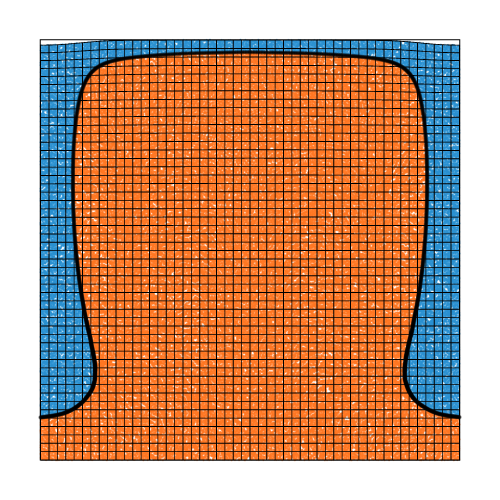

In [15]:
Fig.save("Fig_Kaus2010RTI_1.png")
Fig.show()

In [16]:
import h5py   
import matplotlib.pyplot as plt
import numpy as np
import math

def load_surf_swarm(fdir,step):
    fname = fdir+"interface-"+str(step)+".h5"
    fh5   = h5py.File(fname ,'r')  
    fdata = fh5["data"][()]
    xcoord = fdata[:,0]
    ycoord = fdata[:,1]
    return xcoord,ycoord

def load_depth(fdir,maxstep,dstep):
    depth_l = []
    depth_r = []
    for step in range(0,maxstep+1,dstep):
        xcoord,ycoord = load_surf_swarm(fdir,step)
        depth_l.append(ycoord[0])   
        depth_r.append(ycoord[-1])  
    return np.array(depth_l),np.array(depth_r)

In [17]:
dt0,maxsteps0,dstep0,= 100,54,1
times0 = np.arange(0,dt0*maxsteps0+dt0*dstep0/2,dt0*dstep0)

fdir += "/"
depth0_l,depth0_r = load_depth(fdir,maxsteps0,dstep0)

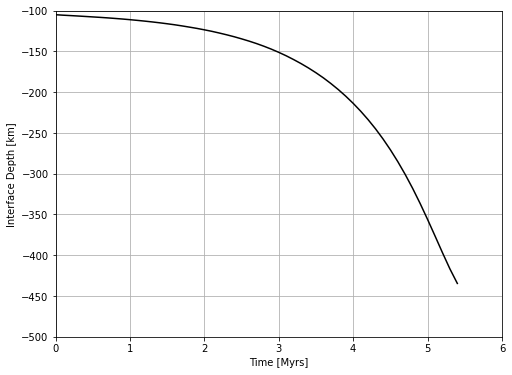

In [18]:
# Fig 3 in Kaus et al., 2010

fname = "Depth of the interface at x=−250km versus time for the free surface simulations"
fig, ax1 = plt.subplots(nrows=1, figsize=(8,6))
ax1.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') 
ax1.plot(times0/1000,depth0_l,'-k')
ax1.set_ylim([-500,-100])
ax1.set_xlim([0,6])
ax1.grid()
#ax1.legend(loc = 'lower right',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight')